# Présentation du modèle

Le modèle skewMSM présente une version plus généralisée du modèle MSM.


Ainsi, il inclut l'actualisation au cours du temps d'un état latent $M_t = (M_t^1, ..., M_t^\bar{k})$. Cet état peut prendre $2^\bar{k} = d$ valeurs possibles, que l'on note $\{m^1, ..., m^d\}$. Comme dans MSM, on définit 
$$\theta_{M_t} = \bar{\theta}\prod_{k = 1}^{\bar{k}}M_t^k$$
(on garde la notation $\theta$ utilisée dans l'article, au lieu de la notation $\sigma$ utilisée pour MSM. Remarquons de plus que l'article prend la notation $\lambda_k$ au lieu de $\gamma_k$ pour les probabilités de switch).

Le modèle MSM consiste à estimer la série des log-return par $y_t = \sqrt{\theta_{M_t}}dW_1$, où $dW_1$ représente un mouvement brownien, et $y_t$ le log-return, aussi noté $r_t$ précédemment. Ainsi la variance est directement donnée par $\theta_{M_t}$ et elle est indépendante de l'espérance de $dy$. On introduit dans le nouveaux modèle un couplage entre ces deux grandeurs. La variance est donnée par $v_t$ qui vérifie
$$dv = \kappa(\theta_{M_t} - v_t)dt + \sigma \sqrt{v_t}(\rho dW_{1, t} + \sqrt{1-\rho^2} dW_{2, t})$$
(où le vecteur $(dW_{1, t}, dW_{2, t})$ est un mouvement brownien à deux dimensions).


Le premier terme montre que la variance $v_t$ reste proche de $\theta_{M_t}$ et le paramètre $\kappa$ indique la vitesse à la quelle $v_t$ s'ajuste sur la valeur de $\theta_{M_t}$ lorsque celle-ci varie ou que $v_t$ subit un changement à cause du couplage. Le couplage est représenté par le second terme. 

Plus précisemment, le terme $\sqrt{v_t} dW_{1, t}$ apparait dans l'expression de $dy$. Il s'agit de la projection sur l'axe Ox d'un vecteur gaussien à deux dimensions de variance $v_t I_2$. D'autre part $\sqrt{v_t}(\rho dW_{1, t} + \sqrt{1-\rho^2} dW_{2, t})$ est la projection sur la droite $R(\rho, \sqrt{1-\rho^2})$ du même vecteur gaussien : on comprend mieux comment est fait le couplage, $\rho$ s'interprétant comme une covariance.

\\

Présentons maintenant l'expression complète de $dy$ : 
$$y_t = \mu_t dt + \sqrt{v_t} dW_{1, t} + dJ_t - \bar{J}_{M_{t-dt}} dt $$
où $\mu_t = (\alpha - \frac{1}{2})v_t$ est tel que 
$$\mathbb{E}[y_t | M_t, v_t] = \alpha v_t$$
ainsi $\alpha$ introduit un couplage-retour entre $y_t$ et $v_t$. Avec $\alpha = \frac{1}{2}$, le rôle de $\mu$ est uniquement de s'assurer que la valeur de $v_t$ n'a pas d'influence sur $y_t$.

Ainsi, le couplage ne se fait que dans un sens. Considérons le modèle discret pour mieux comprendre comment cela est possible.
Précisons que $\Delta t$ correspond à l'écart en temps entre les instants notés $t$ et $t+1$. Les équations deviennent : 
$$s_{t} - s_{t-1} = y_{t} = \mu_t \Delta t + \sqrt{v_t \Delta t} \epsilon_{1, t} + dJ_t - \bar{J}_{M_{t-1}} \Delta t$$
et
$$v_{t+1} - v_{t} = \kappa(\theta_{M_t} - v_t)dt + \sigma \sqrt{v_t \Delta t}(\rho \epsilon_{1, t} + \sqrt{1-\rho^2} \epsilon_{2, t})$$
($\epsilon_{1, t}$ et $\epsilon_{2, t}$ sont des gaussiennes centrées réduites indépendantes, de sorte qu'en ajoutant le facteur $\sqrt{v_t \Delta t}$ leur variance devient $v_t \Delta t$)

Ainsi on voit que le calcul de $v_t$ fait intervenir $\epsilon_{1, t-1}$, independant de $\epsilon_{1, t}$ qui intervient dans le calcul de $y_t$ : en fait le couplage se fait entre $v_t$ et $y_{t+1}$ (mais c'est bien $v_{t+1}$ qui est utilisé pour calculer $y_{t+1}$).

\\

Il reste à présenter le terme $dJ_t - \bar{J}_{M_t} dt$. On a formellement : 
$$dJ_t = \beta \sum_{k = 1}^\bar{k} \frac{1}{\lambda_k} signe(M_t^k - M_{t-dt}^k) \qquad  et \qquad \bar{J}_{M_{t-dt}} dt = \mathbb{E}[e^{dJ_t} - 1 | M_{t-dt}]$$
Ainsi $dJ_t$ n'est pas infinitésimal : il introduit des discontinuité même dans le modèle continu : ce sont les sauts. Ces sauts sont d'autant plus grands qu'ils sont rares. Deux sauts correspondant aux transitions inverses ($m^i \rightarrow m^j$ et $m^j \rightarrow m^i$ par exemple) s'annulent. $\bar{J}_{M_t}$ est un terme de compensation. En notations discrètes, 
$$dJ_t = \beta \sum_{k = 1}^\bar{k} \frac{1}{\lambda_k} signe(M_t^k - M_{t-1}^k) \qquad  et \qquad \bar{J}_{M_{t-1}} \Delta t = \mathbb{E}[e^{dJ_t} - 1 | M_{t-1}]$$

Cela clôt la description du modèle skewMSM, mais il existe une variante présentée par l'article, que nous noterons skewMSM* (ce n'est pas vraiment une notation présentée par l'article, mais le symbole * est bien associé à cette variante dans l'article).

Il s'agit de rajouter un "risk premium" pour la transition $M_t^k = 2-m_0 \rightarrow M_{t+1}^k = m_0$. Ce "risk premium" est donné par 
$$rp = (b*)^{2(\bar{k} - k)}$$
c'est à dire que la transition $M_t^k = 2-m_0 \rightarrow M_{t+1}^k = m_0$ a pour probabilité $\frac{\lambda_k}{2} rp$ et la transition inverse $M_t^k = m_0 \rightarrow M_{t+1}^k = 2-m_0$ a pour probabilité $\frac{\lambda_k}{2 rp}$

Contrairement à un modèle plus abstrait comme peut l'être RNN, ou même les modèles de la famille Arch, l'intérêt de ce modèle est aussi descriptif : on revient ainsi sur les différnets paramètres pour expliquer leur signification plus précisemment.

$\lambda_\bar{k}$ est la fréquence à laquelle $M_t^\bar{k}$ est recalculée (et ainsi $\lambda_\bar{k}/2$ est la fréquence à laquelle $M_t^\bar{k}$ change : c'est dons la fréquence des sauts de plus petite amplitude). $M_t^\bar{k}$ est la particule qui change le plus souvent : toutes les autres sont recalculées à des fréquences inférieures et proportionnelles à $\lambda_\bar{k}$.


$\frac{1}{b}$ est le coefficient de proportionnalité entre cette fréquence et la deuxième plus grande fréquence ($\lambda_{\bar{k}-1}$). C'est aussi le coefficient de proportionnalité entre la deuxième et la troisième plus grande fréquence, etc.


$m_0$ mesure l'impact d'un tel changement de $M_t^k$ (pour n'importe quel k) sur la volatilité (auquel il faut rajouter l'action de $J$).

$\beta$ détermine l'amplitude des sauts. $\beta > 0$ signifie qu'une brusque augmentation (saut) du prix va être suivie d'une phase où la volatilité est plus élevée (cette augmentation de la volatilité d'autant plus retardée que $\kappa$ est petit). Au contraire $\beta < 0$ correspond au phénomène inverse : la volatilité augmente après une brusque diminution du prix.

$\kappa$ détermine la vitesse à laquelle $v_t$ s'ajuste sur la valeur de $\theta_{M_t}$, à la fois lorsque $\theta_{M_t}$ varie (lors d'un changement de $M_t$) et lorsque $v_t$ subit un dérèglement (à cause de son couplage avec $s_{t-1}$).

$\sigma$ détermine la variance du couplage avec $s_{t-1}$ qui est utilisé lors du calcul de $v_t$.

$\rho$ détermine le couplage entre $s_{t-1}$ et $v_t$. Plus précisemment, $ \qquad \sigma \rho \quad  = \quad Cov[ \quad \epsilon_{1, t} \quad , \quad \sigma (\rho \epsilon_{1, t} + \sqrt{1-\rho^2} \epsilon_{2, t}) \quad ]$

$\bar{\theta}$ correspond essentiellement à la variance (moyenne) du therme $\sqrt{v_t \Delta t} \epsilon_{1, t}$.

$\alpha$ correspond à l'\textit{excess return}, ie le gain que l'on espère obtenir quand la volatilité augmente (un investissement risqué est présumé plus rentable), comme le montre la formule $\mathbb{E}[y_t | M_t, v_t] = \alpha v_t$.

$b*$ mesure combien une transition d'un état à faible volatilité vers un état à forte volatilité est plus probable que sa transition inverse. Il mesure ainsi combien une augmentation de la volatilité est plus probable qu'une diminution de celle-ci (les écarts étant de même amplitude). Rappelons que si $\beta > 0$ une augmentation de la volatilité est précédée d'une augmentation du prix, et si $\alpha > 0$ elle engendre une augmentation du prix.

On peut prendre $\bar{\theta} = 1$, en effet, pour toute constante $r$, le modèle décrit pour 
$$(\Delta t, \quad \lambda_\bar{k}, \quad b, \quad m_0, \quad \beta, \quad \kappa, \quad \sigma, \quad \rho, \quad \bar{\theta}, \quad \alpha, \quad b^*)$$
équivaut à celui décrit par
$$(\frac{\Delta t}{r}, \quad r . \lambda_\bar{k}, \quad b, \quad m_0, \quad r . \beta, \quad r . \kappa, \quad r . \sigma, \quad \rho, \quad r . \bar{\theta}, \quad \alpha, \quad b^*)$$

De plus, l'article ajoute un paramètre $\kappa^*$. Nous ne prenons pas ce paramètre en compte dans notre étude, puisque le modèle décrit par $(\bar{\theta}, \kappa^*)$ équivaut à celui décrit par $(\frac{\kappa \bar{\theta}}{\kappa^*}, \kappa)$.

# REGLER LE PROBLEME d'OVERFLOW QUAND BETA >>LAMBDA

# Librairies

In [98]:
import numpy as np

import pandas as pd
import scipy.optimize as opt
from scipy import stats
from scipy.linalg import expm
from statsmodels import regression
import statsmodels.formula.api as sm
from numba import jit, njit, prange, float64, int64
import os
import glob
from datetime import datetime, timedelta, date
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
plt.ion()

global kbar
kbar = 3

global display
display = False

import time
global fTime
fTime = 0.0
global auxTime
auxTime = 0.0

from tqdm.notebook import tqdm
import sklearn.metrics

# Fonctions Générales

In [2]:
def gaussienne(x): #bizarrement stats.norm.pdf a un runtime très important...
    return np.exp(-(x**2)/2)/np.sqrt(2*np.pi)

In [3]:
"""
in : des paramètres présentés comme dans le rapport pour dt = 1
out : des paramètres utiles pour les fonctions de calcul (simuleData, ELL, VLL)
"""
def paramCalcul(param):
    if(len(param)==10): #ie star
        lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, bStar = param
        lambda1 = lam*(b**(1-kbar))
        return(lam, b, m0, beta/lambda1, kappa, sigma, rho, thetaBar, alpha, bStar**2)
    else: #ie not star
        lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha = param
        lambda1 = lam*(b**(1-kbar))
        return(lam, b, m0, beta/lambda1, kappa, sigma, rho, thetaBar, alpha, 1.0)


In [4]:
"""
in : des paramètres présentés comme dans le rapport pour dt = 1
out : des paramètres utiles pour les fonctions d'optimisation (minStar, minNotStar, gloMin)
"""


def paramOpti(param):
    if (len(param) == 10): #star
        lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, bStar = param
        return(1/lam, np.log(b), m0, beta, 1/kappa, sigma, rho, thetaBar, alpha, np.log(bStar)*2) 
    else: #not star
        lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha = param
        #on fixe lambda_\bar{k} = 1 (de sorte que dt donne le "tempo")
        return(1/lam, np.log(b), m0, beta, 1/kappa, sigma, rho, thetaBar, alpha) 
        

In [5]:
"""
in : des paramètres présentés comme dans le rapport pour dt = 1
out : des paramètres utiles pour les fonctions d'optimisation (minStar, minNotStar, gloMin)
"""


def paramStep1Opti(param):
    if (len(param) ==6): #star
        lam, b, m0, thetaBar, alpha, bStar = param
        return(1/lam, np.log(b), m0, thetaBar, alpha, np.log(bStar)*2) 
    else: #not star
        lam, b, m0, thetaBar, alpha = param
        #on fixe lambda_\bar{k} = 1 (de sorte que dt donne le "tempo")
        return(1/lam, np.log(b), m0, thetaBar, alpha) 
        

In [6]:
def paramStep1BoundsOpti(bounds):
    if (len(bounds) == 6): #ie star       
        (lam1, lam2), (b1, b2), (m01, m02), (thetaBar1, thetaBar2), (alpha1, alpha2), (bStar1, bStar2) = bounds
        lam1, b1, m01, thetaBar1, alpha1, bStar1 = paramStep1Opti((lam1, b1, m01, thetaBar1, alpha1, bStar1))
        lam2, b2, m02, thataBar2, alpha2, bStar2 = paramStep1Opti((lam2, b2, m02, thetaBar2, alpha2, bStar2))
        return((lam2, lam1), (b1, b2), (m01, m02), (thetaBar1, thetaBar2), (alpha1, alpha2), (bStar1, bStar2))
    else: #ie not star
        (lam1, lam2), (b1, b2), (m01, m02), (thetaBar1, thetaBar2), (alpha1, alpha2) = bounds
        lam1, b1, m01, thetaBar1, alpha1 = paramStep1Opti((lam1, b1, m01, thetaBar1, alpha1))
        lam2, b2, m02, thataBar2, alpha2 = paramStep1Opti((lam2, b2, m02, thetaBar2, alpha2))
        return((lam2, lam1), (b1, b2), (m01, m02), (thetaBar1, thetaBar2), (alpha1, alpha2))

In [7]:
def paramStep1Calcul(param):
    if(len(param)==6): #ie star
        lam, b, m0, thetaBar, alpha, bStar = param
        return(lam, b, m0, thetaBar, alpha, bStar**2)
    else: #ie not star
        lam, b, m0, thetaBar, alpha = param
        return(lam, b, m0, thetaBar, alpha, 1.0)

In [8]:
def paramStep2Calcul(param):
    if(len(param)==7): #ie star
        lam, b, m0, beta, thetaBar, alpha, bStar = param
        lambda1 = lam*(b**(1-kbar))
        return(lam, b, m0, beta/lambda1, thetaBar, alpha, bStar**2)
    else: #ie not star
        lam, b, m0, beta, thetaBar, alpha = param
        lambda1 = lam*(b**(1-kbar))
        return(lam, b, m0, beta/lambda1, thetaBar, alpha, 1.0)

In [9]:
def paramStep1Rapport(dt, param): #dt est fixé (c'est logique que ce soit le même pour )
    if(len(param)==6): #ie star
        Llam, ln_b, m0, thetaBar, alpha, ln_b2Star = param
        return(dt/Llam, np.exp(ln_b), m0, dt*thetaBar, alpha, np.exp(ln_b2Star/2))
    else:
        Llam, ln_b, m0, thetaBar, alpha = param
        return(dt/Llam, np.exp(ln_b), m0, dt*thetaBar, alpha)

In [10]:
def paramBoundsOpti(bounds):
    if (len(bounds) == 10): #ie star       
        (lam1, lam2), (b1, b2), (m01, m02), (beta1, beta2), (kappa1, kappa2), (sigma1, sigma2), (rho1, rho2), (thetaBar1, thetaBar2), (alpha1, alpha2), (bStar1, bStar2) = bounds
        lam1, b1, m01, beta1, kappa1, sigma1, rho1, thetaBar1, alpha1, bStar1 = paramOpti((
            lam1, b1, m01, beta1, kappa1, sigma1, rho1, thetaBar1, alpha1, bStar1))
        lam1, b2, m02, beta2, kappa2, sigma2, rho2, thataBar2, alpha2, bStar2 = paramOpti(
            (lam2, b2, m02, beta2, kappa2, sigma2, rho2, thetaBar2, alpha2, bStar2))
        return((lam2, lam1), (b1, b2), (m01, m02), (beta1, beta2), (kappa2, kappa1),
            (sigma1, sigma2), (rho1, rho2), (thetaBar1, thetaBar2), (alpha1, alpha2), (bStar1, bStar2))
    else: #ie not star
        (lam1, lam2), (b1, b2), (m01, m02), (beta1, beta2), (kappa1, kappa2), (sigma1, sigma2), (rho1, rho2), (thetaBar1, thetaBar2), (alpha1, alpha2) = bounds
        lam1, b1, m01, beta1, kappa1, sigma1, rho1, thetaBar1, alpha1 = paramOpti(
            (lam1, b1, m01, beta1, kappa1, sigma1, rho1, thetaBar1, alpha1))
        lam2, b2, m02, beta2, kappa2, sigma2, rho2, thataBar2, alpha2 = paramOpti(
            (lam2, b2, m02, beta2, kappa2, sigma2, rho2, thetaBar2, alpha2))
        return((lam2, lam1), (b1, b2), (m01, m02), (beta1, beta2), (kappa2, kappa1),
            (sigma1, sigma2), (rho1, rho2), (thetaBar1, thetaBar2), (alpha1, alpha2))

In [11]:
"""
in : des paramètres utiles pour les fonctions d'optimisation (minStar, minNotStar, gloMin)
out : des paramètres présentés comme dans le rapport
"""
def paramRapport(dt, param): #dt est fixé (c'est logique que ce soit le même pour )
    if(len(param)==10): #ie star
        Llam, ln_b, m0, beta, Lkappa, sigma, rho, thetaBar, alpha, ln_b2Star = param
        return(dt/Llam, np.exp(ln_b), m0, dt*beta, dt/Lkappa, dt*sigma, rho, dt*thetaBar, alpha, np.exp(ln_b2Star/2))
    else:
        Llam, ln_b, m0, beta, Lkappa, sigma, rho, thetaBar, alpha = param
        return(dt/Llam, np.exp(ln_b), m0, dt*beta, dt/Lkappa, dt*sigma, rho, dt*thetaBar, alpha)


In [12]:
paramExemple = 0.5, 1.3, 1.5, 0.2, 1.0, 1.0, 0.5, 1.0, 0.1, 1.0
print(paramCalcul(paramExemple))
param2 = paramOpti(paramExemple)
print(param2)
print(paramRapport(1, param2))
print(paramRapport(0.01, param2))


(0.5, 1.3, 1.5, 0.6760000000000002, 1.0, 1.0, 0.5, 1.0, 0.1, 1.0)
(2.0, 0.26236426446749106, 1.5, 0.2, 1.0, 1.0, 0.5, 1.0, 0.1, 0.0)
(0.5, 1.3, 1.5, 0.2, 1.0, 1.0, 0.5, 1.0, 0.1, 1.0)
(0.005, 1.3, 1.5, 0.002, 0.01, 0.01, 0.5, 0.01, 0.1, 1.0)


In [13]:

#l'état M_t est codé par un entier M (dans range(d)). On repère les chiffres de son écriture binaire par leur position qui va 
#de 0 à kbar-1. Un 0 en position k-1 signifie M_{k, t} = 2-m0 alors qu'un 1 signifie M_{k, t} = m0

def bit(i, k):
    #renvoie le bit en positon k-1 dans l'écriture en base 2 de i (on compte les positions en partant de 0)
    return (i >> k) % 2


def transitionMatrix(star, m0, lam, b2Star, b):
    d = 2**kbar
    
    #On commence par calculer la matrice Q
    Q = np.zeros((d, d))
    
    #le lambda donné par les paramètres correspond à lambda_kbar
    lam = lam * (b**(1-kbar))
    #maintenant, lam correspond = lambda_1
    
    rp = b2Star**(kbar - 1)    #risk premium correspondant à un passage d'un m0 vers un 2-m0 en position k=1
    rp = rp*star + (not star)     #si star, on garde rp, sinon on remplace par 1
    
    #on n'a besoin de remplir que les changements d'état où une seule des particules est modifiée
    for k in range(kbar):
        
        p = lam/2   #probabilité de changement de la particule {k+1} sans risk premium
                
        for i in range(d):
            if bit(i, k):   #permet de savoir si il y a un 1 en position k-1 dans l'écriture en base 2 de i
                            #ie si M_{k+1} = m0 avec notre convention
                j = i - 2**k    #revient à changer le M_{k+1} = m0 en M_{k+1} = 2-m0
                
                Q[i, j] = p/rp    #on veut que Q[i, j] = q_i,j soit la proba de passer de i à j
                Q[j, i] = p*rp    
                Q[i, i] -= Q[i, j] 
                Q[j, j] -= Q[j, i]
                
        lam *= b
        rp = rp/b2Star
    return expm(Q)


def jumpsMatrix(lam, b, beta): #attention : beta est en fait betaTilde = beta/lambda_1
    d = 2**kbar
    
    J = np.zeros((d,d))
    
    #le lambda donné par les paramètres correspond à lambda_kbar
    lamTilde = 1
    #maintenant, lamTilde correspond = lambda_1/lambda_1
    
    #on n'a besoin de remplir que les changements d'état où une seule des particules est modifiée
    for k in range(kbar):
                        
        for i in range(d):
            if bit(i, k):   #permet de savoir si il y a un 1 en position k-1 dans l'écriture en base 2 de i
                            #ie si M_k = m0 avec notre convention
                j = i - 2**k    #revient à changer le M_k = m0 en M_k = 2-m0
                
                J[i, j] += (-1)*beta/lamTilde   #on a m_k^j - m_k^i = (2-m0) - m0 < 0 (et tous les autres sont égaux)
                J[j, i] = -J[i, j]

        lamTilde *= b  #lamTilde correspond = lambda_k/lambda_1
        
    for i in range(d):
        for j in range(d):
            J[i, j] = min(J[i, j], 709)
        
        
    #Ainsi tous les coeffs de J sont majorés par beta (qui est en fait betaTilde)
    return J
    

def thetaMt(m0, M, thetaBar):
    res = thetaBar
    m = M      #La parité de m indique si M_{1, t} vaut m0 ou 2-m0
    for i in range(kbar):
        if (m%2):
            res *= m0
        else:
            res *= (2-m0)
        #res *= (m%2)*m0 + (m%2 == 0)*(2-m0) #m0 SSI m%2 = 1 SSI M_{k, t} = m0
        m = m >> 1 #pareil que m = m//2: ainsi maintenant la parité de m indique si M_{k+1, t} vaut m0 ou 2-m0
    return res

def JBarFun(J, A):
    d = A.shape[0]  #car A.shape = (d, d)
    res = np.empty(d)
    for i in range(d):
        res[i] = np.sum((np.exp(J[i, :]) - 1)*A[i, :])
    return res


In [14]:
thetaMt(1.5, 3, 1)

1.125

In [15]:
def f(alpha, J, JBar, y, chi): #ne dépend pas de star
    #y : y_{t} = s_{t} - s_{t-1}
    
    begin = time.time()
 
    (Mminus1, M, v) = chi #M_{t-1}, M_{t}, v_{t}
    mu = (alpha - 0.5)*v  #mu_{t}
    if(np.abs(v) < 1e-10): #v = 0
        return (y - mu - (J[Mminus1][M] - JBar[Mminus1]) < 1e-10) #quelque soit la valeur de epsilon, l'égalité est vérifiée
                                    #si ce terme est nul : on renvoie alors la proba 1, sinon 0
    eps1 = (y - mu - (J[Mminus1][M] - JBar[Mminus1]))/np.sqrt(v)
    #if(eps1 > 38 or eps1 < -38):
    #    print("----------------------", eps1, "(", J[Mminus1][M], " ; ", JBar[Mminus1], " ; ", v, ")")
    
    res = gaussienne(eps1)
    
    global fTime
    fTime += time.time() - begin
    return res

In [16]:
def eps1(alpha, J, JBar, y, chi): #ne dépend pas de star
    #y : y_{t} = s_{t} - s_{t-1}
    
    begin = time.time()
 
    (Mminus1, M, v) = chi #M_{t-1}, M_{t}, v_{t}
    mu = (alpha - 0.5)*v  #mu_{t}
    if(np.abs(v) < 1e-10): #v = 0
        return 100*(y - mu - (J[Mminus1][M] - JBar[Mminus1]) > 1e-10) #quelque soit la valeur de epsilon, l'égalité est vérifiée
                                    #si ce terme est nul : on renvoie 0, sinon 100 (ou un autre nombre très grand)
                                    #en particulier il suffit de renvoyer un nombre > 38 pour que la densité associée soit nulle
    res = (y - mu - (J[Mminus1][M] - JBar[Mminus1]))/np.sqrt(v)
    global fTime
    fTime += time.time() - begin
    return res

    

In [17]:
def initialise(param, star, Y, K, T): #T est inutile, on peut utiliser seulement Y[0] au lieu de tout Y
    
     #les calculs suivant dépendent des paramètres (mais pas de t)
    lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, b2Star = param
    #attention : beta est en fait betaTilde = beta/lambda1
    
    d = 2**kbar
    rho2 = np.sqrt(1-(rho**2))
    A = transitionMatrix(star, m0, lam, b2Star, b)
    J = jumpsMatrix(lam, b, beta)
    JBar = JBarFun(J, A)
    
    CHI_t = [(0, 0, 0)]*K

    
    for k in range(K):
        
        #initialisation
        if star:
            rp = b2Star**(kbar - 1)    #risk premium correspondant à un passage d'un m0 vers un 2-m0 en position k=1
            Mminus1 = 0
            for kpr in range(kbar):
                ergo_k = 1 - 1/(1+rp**2) #probabilité d'avoir M_k = m0 avec la loi ergodique 
                Mminus1 += np.random.binomial(1, ergo_k)*(2**kpr)
                rp = rp/b2Star
        else:
            Mminus1 = np.random.randint(0, d) #loi uniforme
        
        #print("A_Mminus1 : ", sum(A[Mminus1, :]))
        M = np.random.choice(d, 1, True, A[Mminus1, :])[0]
        
        #attention : Y[0] : y_{t=1} et idem pour R et D
        theta = thetaMt(m0, M, thetaBar)
        v = (kappa*theta + sigma*rho*(Y[0] - J[Mminus1][M] + JBar[Mminus1]))/(kappa + sigma*rho*(alpha - 0.5))
        v = max(0, v) #ou faut-il laisser v négatif?
        
        #OU PLUTOT v = thetaMt(kbar, m0, M, thetaBar)

        CHI_t[k] = (Mminus1, M, v)
            
    #pas besoin de resampling car les variables sont tirées selon la loi ergodique (à verifier... surtout pour v)
    #faut-il prendre en compte t = 0 dans le calcul de L?
    return CHI_t

# SimuleData

In [89]:
def simuleData(star, param, M, v, s, T):
    lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, b2Star = param
    d = 2**kbar
    rho2 = np.sqrt(1-(rho**2))
    A = transitionMatrix(star, m0, lam, b2Star, b)
    J = jumpsMatrix(lam, b, beta)
    JBar = JBarFun(J, A)
    
    dat = np.zeros(T)
    
    dat[0] = s    
    #s : s_{0}, v : v_{0} 
    
    W = np.random.randn(1) #correspond en fait à (rho*W1 + rho2*W2) (il n'y a pas de couplage à t = 0)
    
    theta = thetaMt(m0, M, thetaBar)
    
    if display:
        vtab = np.zeros(T)
        vtab[0] = v
        thetatab = np.zeros(T)
        thetatab[0] = theta

    
    v += kappa*(theta - v) + sigma*np.sqrt(v)*W    
    v = max(0, v) #ou faut-il laisser v négatif?

    
    #s : s{0}, v : v{1}
    
    for t in range(T-1):
        i = M #correspond à M_t

        M = np.random.choice(d, 1, True, A[i, :])[0]    #correspond à M_{t+1} 
                                            #(on choisit dans range(d) avec les probas données par la ligne de A)
        theta = thetaMt(m0, M, thetaBar)
        (W1, W2) = np.random.randn(2)
        
        #s : s_{t}, v : v_{t+1}
        
        mu = (alpha - 0.5)*v #mu : mu_{t+1}
        s += mu + np.sqrt(v)*W1 + J[i, M] - JBar[i]
        
        
        #s : s_{t+1}, v : v_{t+1}
        
        dat[t+1] = s
        
        if display:
            vtab[t+1] = v
            thetatab[t+1] = theta
        

        v += kappa*(theta - v) + sigma*np.sqrt(v)*(rho*W1 + rho2*W2)
        v = max(0, v) #ou faut-il laisser v négatif?
            
        #s : s_{t+1}, v : v_{t+2}
        
        dat[t+1] = s
    if display:
        return dat, vtab, thetatab
    else:
        return dat


# Estimation, méthode 1

In [19]:
def propagate(star, d, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, y, chi, A_M):
    #y : y_{t} = s_{t} - s_{t-1}, D_t = d_t, R_t = r_t
    #chi = chi_{t}
    
    (Mminus1, M, v) = chi #M_{t-1}, M_{t}, v_{t}
    Mminus1 = M #correspond à M_t
    M = np.random.choice(d, 1, True, A_M)[0]    #correspond à M_{t+1}  (A_M = A[M, :])
                                        #(on choisit dans range(d) avec les probas données par la ligne de A)
    theta = thetaMt(m0, M, thetaBar)
    mu = (alpha - 0.5)*v  #mu_{t}
    www = y - mu - (J[Mminus1][M] - JBar[Mminus1]) # = W1 * sqrt(v)
    W2 = np.random.randn()    
    v += kappa*(theta - v) + sigma*(rho*www + np.sqrt(v)*rho2*W2)
    v = max(0, v) #ou faut-il laisser v négatif?
    
    return((Mminus1, M, v))

def likelyhood1(param, args):
    
    #les calculs suivant dépendent des paramètres (mais pas de t)
    lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, b2Star = param
    #attention : beta est en fait betaTilde = beta/lambda1
    
    star, stop, Y, K, T = args
    
    
    #print(f"<<<<< lam: {lam} b: {b} m0: {m0} beta: {beta} kappa: {kappa} sigma: {sigma} rho: {rho} thetaBar: {thetaBar} alpha: {alpha}")
    #print(f"Q<<<< b2Star: {b2Star}")
    
    d = 2**kbar
    rho2 = np.sqrt(1-(rho**2))
    A = transitionMatrix(star, m0, lam, b2Star, b)
    J = jumpsMatrix(lam, b, beta)
    JBar = JBarFun(J, A)
        
    LL = 0    #log-vraissemblance
    
    CHI_t = initialise(param, star, Y, K, T)
    p_t = np.empty(K)
    
    if display:
        thetaTab = []
        
    for t in range(1, T-1):
        
        somme = 0.0
        count = 0
        while(somme <= 1e-10):
        
            for k in range(K):
                        
                #on calcule un estimateur de chi PEUT ETRE Y[t] à remplacer avec Y[t-1]
                #print(len(CHI_t), k)
                CHI_t[k] = propagate(
                    star, d, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, Y[t], CHI_t[k], A[CHI_t[k][1], :])

                #on calcule la vraissemblance associée (non normalisée)
                p_t[k] = f(alpha, J, JBar, Y[t], CHI_t[k])
            
            somme = sum(p_t)
            
            
            count += 1
            if(count > 50):
                print("!!!", t)
                if(somme > 1e-300):
                    break
            if(count > stop):
                print("stop : ", t)
                if display:
                    return -1e10, 0, 0, thetaTab
                else:
                    return -1e10, 0, 0
        
        p_t = p_t/somme
        idx_CHI_t = np.random.choice(K, K, True, p_t) 
        for k in range(K):
            CHI_t[k] = CHI_t[idx_CHI_t[k]]
        
        
        #on calcule les nouvelles vraissemblances
        p_t = [f(alpha, J, JBar, Y[t], CHI_t[k]) for k in range(K)] #pas sur que ca marche pour un array (au pire, faire une boucle)
        #ICI ON FAIT PLEIN DE CALCULS DEUX FOIS. ON PEUT FAIRE MIEUX EN APPLIQUANT RANDOM.CHOICE SUR LA PAIRE (CHI_t, p_t) 
        #au lieu de juste CHI_t        
        
        if display:
            thetaTab += [np.mean([np.log(thetaMt(m0, CHI_t[k][1], thetaBar)) for k in range(K)])]
        
        LL += np.log(sum(p_t)/K)
    
    Chi = CHI_t[0]
    
    if(T > 1000, K > 5):
        print("likelyhood1 end", args, LL, param) 
    
    if display:
        return (LL, Chi[1], Chi[2], thetaTab) #on renvoie aussi M et v   
    else:
        return (LL, Chi[1], Chi[2])


# Estimation, méthode 2

In [20]:
def stratPropagate(star, d, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, y, chi, A_M):
    #y : y_{t} = s_{t} - s_{t-1}, D_t = d_t, R_t = r_t
    #chi = chi_{t}
    
    (Mminus1, M, v0) = chi #M_{t-1}, M_{t}, v_{t}
    Mminus1 = M #correspond à M_t
    
    l = [] #l'ensemble des d particules que l'on va construire
    
    for i in range(d):
        v = v0
        theta = thetaMt(m0, i, thetaBar)
        mu = (alpha - 0.5)*v  #mu_{t}
        www = y - mu - (J[Mminus1][i] - JBar[Mminus1]) # = W1 * sqrt(v)
        W2 = np.random.randn()
        
        v += kappa*(theta - v) + sigma*(rho*www + np.sqrt(v)*rho2*W2)
        v = max(0, v) #ou faut-il laisser v négatif?
            
        l += [(Mminus1, i, v)]
        
    return(l)

In [21]:
def likelyhood2(param, args):

    #les calculs suivant dépendent des paramètres (mais pas de t)
    lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, b2Star = param
    #attention : beta est en fait betaTilde = beta/lambda1
    
    star, stop, Y, K, R, T = args
       
    T = min(T, len(Y))
    d = 2**kbar
    rho2 = np.sqrt(1-(rho**2))
    A = transitionMatrix(star, m0, lam, b2Star, b)
    J = jumpsMatrix(lam, b, beta)
    JBar = JBarFun(J, A)
    
        
    LL = 0    #log-vraissemblance
    
    CHI_t = initialise(param, star, Y, K, T)
    p_t = np.empty(K)
    ChiEst = [(0, 0, 0)]*(K*d) #l'indice double (k, j) est codé par l'indice j*K + k
    w = np.zeros((K, d))
    q = np.empty(d)
    ChiEstEst = [(0, 0, 0)]*(R*d) #l'indice double (r, j) est codé par l'indice j*R + r
    wNew = np.empty(R*d) #l'indice double (r, j) est codé par l'indice j*R + r
    
    if display:
        thetaTab = []
    
    for t in range(1, T-1):
        
        somme = 0.0
        count = 0
        while(somme <= 1e-10):
            
            somme = 0.0
            
            for j in range(d): #peut être un meilleur moyen de faire ça?
                q[j] = 0
                
            for k in range(K):
                            
                #on calcule un estimateur de chi. Plus précisemment, on calcule les chi^
                ChiEst_k = stratPropagate(
                    star, d, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, Y[t], CHI_t[k], A[CHI_t[k][1], :])
                
                for j in range(d):
                    ChiEst[j*K + k] = ChiEst_k[j]
                    w[k, j] = A[CHI_t[k][1]][j]
                    q[j] += w[k, j]
            
            #On ne renormalise pas q, car renormaliser les w(k, j)/q(j) (cf. étape suivante) revient à utiliser les q non
            #normalisés au lieu des q normalisés. En fait multiplier les q par une constante ne sert à rien
            
            #q = q/(sum(q)) #les termes de q sont calculés directement avec A donc n'ont pas de raison d'être nuls
            
            
            #premier resampling
            for j in range(d):
            
                #remplacer la j-eme colonne de w par elle-même divisée par q[j] et renommarliser
                np.multiply(w[:, j], 1/q[j], out = w[:, j]) 
                idxCHI_EstEst_j = np.random.choice(K, R, True, w[:, j]) #il s'agit des {chi^}^
                
                #print("DIVERSITE : ", len(set(idxCHI_EstEst_j)), " / ", R)

            
                for r in range(R):
                    ChiEstEst[j*R + r] = ChiEst[j*K + idxCHI_EstEst_j[r]]
                    wNew[j*R + r] = q[j]*f(alpha, J, JBar, Y[t], ChiEstEst[j*R + r])
                    somme += wNew[j*R + r]
                    
            
            count += 1
            if(count > 50):
                print("!!!", t)
                if(somme > 1e-300):
                    break
            if(count > stop):
                print("stop : ", t)
                if display:
                    return -1e10, 0, 0, thetaTab
                else:
                    return -1e10, 0, 0
        
        wNew = wNew/somme
        
        #deuxième resampling
        idxChi_t = np.random.choice(R*d, K, True, wNew) 
        
        efficacite = 0
        
        for k in range(K):
            CHI_t[k] = ChiEstEst[idxChi_t[k]]
            if(CHI_t[k][0] != CHI_t[k][1]):
                efficacite += 1
        #print("................efficacite : ", efficacite, " / ", K, "(avec ", R, ")")
        #print(CHI_t)
        
        #on calcule les nouvelles vraissemblances
        p_t = [f(alpha, J, JBar, Y[t], CHI_t[k]) for k in range(K)]
        #MEME COMMENTAIRE QUE LIKELYHOOD1
        
        if display:
            thetaTab += [np.mean([np.log(thetaMt(m0, CHI_t[k][1], thetaBar)) for k in range(K)])]
        
        LL += np.log(sum(p_t)/K)
    
    Chi = CHI_t[0]
    
    if(T > 1000, K > 5):
        print("likelyhood2 end", args, LL) 
        
    if display:
        return (LL, Chi[1], Chi[2], thetaTab) #on renvoie aussi M et v   
    else:
        return (LL, Chi[1], Chi[2])


# Estimation, méthode 2bis

In [22]:
def singlePropagate(star, d, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, y, chi, i, A_M):
    #y : y_{t} = s_{t} - s_{t-1}, D_t = d_t, R_t = r_t
    #chi = chi_{t}
    
    (Mminus1, M, v) = chi #M_{t-1}, M_{t}, v_{t}
    Mminus1 = M #correspond à M_t    
    
    theta = thetaMt(m0, i, thetaBar)
    mu = (alpha - 0.5)*v  #mu_{t}
    www = y - mu - (J[Mminus1][i] - JBar[Mminus1]) # = W1 * sqrt(v)
    W2 = np.random.randn()
        
    v += kappa*(theta - v) + sigma*(rho*www + np.sqrt(v)*rho2*W2)
    v = max(0, v) #ou faut-il laisser v négatif?
            
    return (Mminus1, i, v)


In [23]:
def likelyhood2bis(param, args):

    #les calculs suivant dépendent des paramètres (mais pas de t)
    lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, b2Star = param
    #attention : beta est en fait betaTilde = beta/lambda1

    star, stop, Y, K, R, T = args
       
    T = min(T, len(Y))
    d = 2**kbar
    rho2 = np.sqrt(1-(rho**2))
    A = transitionMatrix(star, m0, lam, b2Star, b)
    J = jumpsMatrix(lam, b, beta)
    JBar = JBarFun(J, A)
        
    LL = 0    #log-vraissemblance
    
    CHI_t = initialise(param, star, Y, K, T)
    p_t = np.empty(K)
    ChiEst = [(0, 0, 0)]*(K*d) #l'indice double (k, j) est codé par l'indice j*K + k
    w = np.zeros((K, d))
    q = np.empty(d)
    ChiEstEst = [(0, 0, 0)]*(R*d) #l'indice double (r, j) est codé par l'indice j*R + r
    wNew = np.empty(R*d) #l'indice double (r, j) est codé par l'indice j*R + r
    
    if display:
        thetaTab = []
    
    for t in range(1, T-1):
        
        somme = 0.0
        count = 0
        while(somme <= 1e-10):
            
            somme = 0.0
            
            for j in range(d):
                q[j] = 0
        
            #on pondère les particules avant même de les construire (pour ne pas construire des particules inutiles)
            for k in range(K):
                for j in range(d):
                    w[k, j] = A[CHI_t[k][1]][j]
                    q[j] += w[k, j]
            
            #On ne renormalise pas q, car renormaliser les w(k, j)/q(j) (cf. étape suivante) revient à utiliser les q non
            #normalisés au lieu des q normalisés. En fait multiplier les q par une constante ne sert à rien
            
            
            #premier resampling
            for j in range(d):
            
                #remplacer la j-eme colonne de w par elle-même divisée par q[j] et renommarliser
                np.multiply(w[:, j], 1/q[j], out = w[:, j]) 
                idxCHI_EstEst_j = np.random.choice(K, R, True, w[:, j]) #il s'agit des {chi^}^
                
                #print("DIVERSITE : ", len(set(idxCHI_EstEst_j)), " / ", R)

            
                for r in range(R):
                    
                    #ChiEstEst[j*R + r] = ChiEst[j*K + idxCHI_EstEst_j[r]]
                    ChiEstEst[j*R + r] = singlePropagate(
                        star, d, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, Y[t], 
                        CHI_t[idxCHI_EstEst_j[r]], j, A[CHI_t[idxCHI_EstEst_j[r]][1], :])
                    
                    
                    wNew[j*R + r] = q[j]*f(alpha, J, JBar, Y[t], ChiEstEst[j*R + r])
                    somme += wNew[j*R + r]
                                
            count += 1
            if(count > 50):
                print("!!!", t)
                if(somme > 1e-300):
                    break
            if(count > stop):
                print("stop : ", t)
                if display:
                    return -1e10, 0, 0, thetaTab
                else:
                    return -1e10, 0, 0
        
        wNew = wNew/somme
        
        #deuxième resampling
        idxChi_t = np.random.choice(R*d, K, True, wNew) 
        
        efficacite = 0
        
        for k in range(K):
            CHI_t[k] = ChiEstEst[idxChi_t[k]]
            if(CHI_t[k][0] != CHI_t[k][1]):
                efficacite += 1
        #print("................efficacite : ", efficacite, " / ", K, "(avec ", R, ")")
        #print(CHI_t)
        
        #on calcule les nouvelles vraissemblances
        p_t = [f(alpha, J, JBar, Y[t], CHI_t[k]) for k in range(K)]
        #MEME COMMENTAIRE QUE LIKELYHOOD1
        
        if display:
            thetaTab += [np.mean([np.log(thetaMt(m0, CHI_t[k][1], thetaBar)) for k in range(K)])]
        
        LL += np.log(sum(p_t)/K)
    
    Chi = CHI_t[0]
    
    if(T > 1000, K > 5):
        print("likelyhood2bis end", args, LL) 
    
    if display:
        return (LL, Chi[1], Chi[2], thetaTab) #on renvoie aussi M et v   
    else:
        return (LL, Chi[1], Chi[2])


# Estimation, méthode 3

In [24]:
#pas besoin de recoder propagate : on utilise alternativement celles des méthodes 1 ou 2

def likelyhood3(param, args):

    #les calculs suivant dépendent des paramètres (mais pas de t)
    lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, b2Star = param
    #attention : beta est en fait betaTilde = beta/lambda1
    
    star, stop, Y, K, T = args
    
    T = min(T, len(Y))
    d = 2**kbar
    rho2 = np.sqrt(1-(rho**2))
    A = transitionMatrix(star, m0, lam, b2Star, b)
    J = jumpsMatrix(lam, b, beta)
    JBar = JBarFun(J, A)
    
        
    LL = 0    #log-vraissemblance
    
    CHI_t = initialise(param, star, Y, K, T)
    p_t = np.empty(K)
    ChiEst = [(-1, -1, -1)]*(K*d) #l'indice double (k, j) est codé par l'indice j*K + k
    p = np.empty(K*d) #l'indice double (k, j) est codé par l'indice j*K + k
    
    if display:
        thetaTab = []
        
    for t in range(1, T-1):
        
        somme = 0.0
        count = 0
        while(somme <= 1e-10):
            
            somme = 0.0
        
            for k in range(K):
                            
                #on calcule un estimateur de chi. Plus précisemment, on calcule les chi^
                ChiEst_k = stratPropagate(
                    star, d, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, Y[t], CHI_t[k], A[CHI_t[k][1], :])
                
                for j in range(d):
                    ChiEst[j*K + k] = ChiEst_k[j]
            
            #On ne renormalise pas q, car renormaliser les w(k, j)/q(j) (cf. étape suivante) revient à utiliser les q non
            #normalisés au lieu des q normalisés. En fait multiplier les q par une constante ne sert à rien
            
            #q = q/(sum(q)) #les termes de q sont calculés directement avec A donc n'ont pas de raison d'être nuls
            
            #premier resampling
            for j in range(d):
                            
                for k in range(K):
                    p[j*K+k] = A[ChiEst[j*K + k][0]][ChiEst[j*K + k][1]]*f(alpha, J, JBar, Y[t], ChiEst[j*K + k])
                    somme += p[j*K + k]
                    
            
            count += 1
            if(count > 50):
                print("!!!", t)
                if(somme > 1e-300):
                    break
            if(count > stop):
                print("stop : ", t)
                if display:
                    return -1e10, 0, 0, thetaTab
                else:
                    return -1e10, 0, 0
        
        p = p/somme
        
        #deuxième resampling
        idxChi_t = np.random.choice(K*d, K, True, p) 
        for k in range(K):
            CHI_t[k] = ChiEst[idxChi_t[k]]
        
        #on calcule les nouvelles vraissemblances
        p_t = [f(alpha, J, JBar, Y[t], CHI_t[k]) for k in range(K)]
        #MEME COMMENTAIRE QUE LIKELYHOOD1
        
        if display:
            thetaTab += [np.mean([np.log(thetaMt(m0, CHI_t[k][1], thetaBar)) for k in range(K)])]
        
        LL += np.log(sum(p_t)/K)
    
    Chi = CHI_t[0]
    
    if(T > 1000, K > 5):
        print("likelyhood3 end", args, LL) 
    
    if display:
        return (LL, Chi[1], Chi[2], thetaTab) #on renvoie aussi M et v   
    else:
        return (LL, Chi[1], Chi[2])


# Estimation, méthode 4

In [25]:
def stratTransPropagate(star, d, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, y, chi, A_M):
    #y : y_{t} = s_{t} - s_{t-1}, D_t = d_t, R_t = r_t
    #chi = chi_{t}
    
    (Mminus1, M, v) = chi #M_{t-1}, M_{t}, v_{t}
    Mminus1 = M #correspond à M_t
    
    mu = (alpha - 0.5)*v  #mu_{t}
    
    W2 = np.random.randn()
    
    cste1 = y - mu - (0 - JBar[Mminus1]) #  = W1 * sqrt(v) + J[Mminus1][M]
    cste2 = rho*cste1 + np.sqrt(v)*rho2*W2
              
    l = [0]*d #l'ensemble des d particules que l'on va construire
    global auxTime
    
    for i in range(d):
        begin = time.time()
        M = Mminus1^i #l'état obtenu en appliquant la transition i à M_t
        theta = thetaMt(m0, M, thetaBar)
        
        auxTime += time.time() - begin
        
        
        l[i] = (Mminus1, Mminus1^i, max(0, v + kappa*(theta - v) + sigma*(cste2 - rho*J[Mminus1][M])))
            #ou faut-il laisser v négatif?        
    
    return(l)

#peut être essayer une nouvelle version où on regarde seulement les transitions où une seule composante change, puis prendre une
#version combinée, où on prend X particules simulées aléatoirement et kbar particules correspondant à chaque transition


In [26]:
def likelyhood4(param, args):

    #les calculs suivant dépendent des paramètres (mais pas de t)
    lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, b2Star = param
    #attention : beta est en fait betaTilde = beta/lambda1
    
    star, stop, Y, K, RtotMin, T = args
 
    T = min(T, len(Y))
    d = 2**kbar
    rho2 = np.sqrt(1-(rho**2))
    A = transitionMatrix(star, m0, lam, b2Star, b)
    J = jumpsMatrix(lam, b, beta)
    JBar = JBarFun(J, A)
    
    
    Rtab = np.zeros(d)
    
    Rtot = 0 #c'est d'ailleurs le seul endroit où on aura besoin de la valeur de cumulRtab[d]
    
        
    LL = 0    #log-vraissemblance
    
    CHI_t = initialise(param, star, Y, K, T)
    p_t = np.empty(K)
    ChiEst = [(0, 0, 0)]*(K*d) #l'indice double (k, j) est codé par l'indice j*K + k
    eps1tab = [(0, 0, 0)]*(K*d) #l'indice double (k, j) est codé par l'indice j*K + k
    ChiEstEst = [(0, 0, 0)]*(RtotMin+d) #l'indice double (r, j) est codé par l'indice j*cumulRtab[j-1] + r
    wNew = np.empty((RtotMin + d)*d) #l'indice double (r, j) est codé par l'indice j*cumulRtab[j-1] + r
    
    if display:
        thetaTab = []
    
    for t in range(1, T-1):
        
        somme = 0.0
        count = 0
        while(somme <= 1e-10):
            
            somme = 0.0
               
            for k in range(K):
                    
                #on calcule un estimateur de chi. Plus précisemment, on calcule les chi^
                ChiEst_k = stratTransPropagate(
                    star, d, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, Y[t], CHI_t[k], A[CHI_t[k][1], :])
                
                for j in range(d):
                    Rtab[j] += A[ChiEst_k[j][0]][ChiEst_k[j][1]] #nb : ChiEst_k[j][1] = ChiEst_k[j][0]^j
                        #attention : dépend de j, mais aussi de k!
                    ChiEst[j*K + k] = ChiEst_k[j]
                    eps1tab[j*K + k] = eps1(alpha, J, JBar, Y[t], ChiEst_k[j])
            
            #On ne renormalise pas q, car renormaliser les w(k, j)/q(j) (cf. étape suivante) revient à utiliser les q non
            #normalisés au lieu des q normalisés. En fait multiplier les q par une constante ne sert à rien
            
            
            Rtot = sum(Rtab)
            Rtab = (Rtab*(RtotMin/Rtot) + 1).astype(int) #ainsi RtotMin < sum(Rtab) < RtotMin + d
            cumulRtab = 0
            
            #premier resampling 
            for j in range(d):
                
                #cumulRtab = Rtab[0] + ... + Rtab[j-1]
            
                idx = np.argsort(eps1tab[j*K : (j+1)*K])[0 : Rtab[j]] #les Rtab[j] indices les plus probables (selon eps1)
                                    
            
                #on peut calculer cumulRtab[j] seulement ici, au sein de la boucle
    
                for r in range(Rtab[j]):
                    ChiEstEst[cumulRtab + r] = ChiEst[idx[r]]
                    wNew[cumulRtab + r] = A[ChiEst[idx[r]][0]][ChiEst[idx[r]][1]]*f(alpha, J, JBar, Y[t], ChiEstEst[cumulRtab + r])/Rtab[j]
                    somme += wNew[cumulRtab + r]
                    
                cumulRtab += Rtab[j] #cumulRtab = Rtab[0] + ... + Rtab[j]
                    
            #mtn cuumulRtab = sum(Rtab)
            
            count += 1
            if(count > 50):
                print("!!!", t)
                if(somme > 1e-300):
                    break
            if(count > stop):
                print("stop : ", t)
                if display:
                    return -1e10, 0, 0, thetaTab
                else:
                    return -1e10, 0, 0
        
        wNew = wNew/somme
        
        #deuxième resampling
        idxChi_t = np.random.choice(cumulRtab, K, True, wNew[0 : cumulRtab]) 
        
        #efficacite = 0
        
        for k in range(K):
            CHI_t[k] = ChiEstEst[idxChi_t[k]]
            if(CHI_t[k][0] != CHI_t[k][1]):
                efficacite += 1
        #print("................efficacite : ", efficacite, " / ", K, "(avec ", R, ")")
        #print(CHI_t)
        
        #on calcule les nouvelles vraissemblances
        p_t = [f(alpha, J, JBar, Y[t], CHI_t[k]) for k in range(K)]
        #MEME COMMENTAIRE QUE LIKELYHOOD1
        
        if display:
            thetaTab += [np.mean([np.log(thetaMt(m0, CHI_t[k][1], thetaBar)) for k in range(K)])]
        
        LL += np.log(sum(p_t)/K)
    
    Chi = CHI_t[0]
    
    if(T > 1000, K > 5):
        print("likelyhood4 end", args, LL) 
    
    if display:
        return (LL, Chi[1], Chi[2], thetaTab) #on renvoie aussi M et v   
    else:
        return (LL, Chi[1], Chi[2])


# Estimation, méthode 2s

In [27]:
def likelyhood2s(param, args):

    #les calculs suivant dépendent des paramètres (mais pas de t)
    lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, b2Star = param
    #attention : beta est en fait betaTilde = beta/lambda1
    
    star, stop, Y, K, T = args

        
    T = min(T, len(Y))
    d = 2**kbar
    rho2 = np.sqrt(1-(rho**2))
    A = transitionMatrix(star, m0, lam, b2Star, b)
    J = jumpsMatrix(lam, b, beta)
    JBar = JBarFun(J, A)
        
    LL = 0    #log-vraissemblance
    
    CHI_t = initialise(param, star, Y, K, T)
    p_t = np.empty(K)
    ChiEst = [(0, 0, 0)]*(K*d) #l'indice double (k, j) est codé par l'indice j*K + k
    w = np.zeros((K, d))
    q = np.empty(d)
    ChiEstEst = [(0, 0, 0)]*d #l'indice double (r, j) est codé par l'indice j*R + r
    wNew = np.empty(d) #l'indice double (r, j) est codé par l'indice j*R + r
    
    if display:
        thetaTab = []
    
    for t in range(1, T-1):
        
        somme = 0.0
        count = 0
        while(somme <= 1e-10):
            
            somme = 0.0
            
            for j in range(d):
                q[j] = 0
        
            #on pondère les particules avant même de les construire (pour ne pas construire des particules inutiles)
            for k in range(K):
                for j in range(d):
                    w[k, j] = A[CHI_t[k][1]][j]
                    q[j] += w[k, j]
            
            #On ne renormalise pas q, car renormaliser les w(k, j)/q(j) (cf. étape suivante) revient à utiliser les q non
            #normalisés au lieu des q normalisés. En fait multiplier les q par une constante ne sert à rien
            
            
            #premier resampling
            for j in range(d):
            
                #remplacer la j-eme colonne de w par elle-même divisée par q[j] et renommarliser
                np.multiply(w[:, j], 1/q[j], out = w[:, j]) 
                idx = np.random.choice(K, 1, True, w[:, j])[0] #il s'agit des {chi^}^
                
                #print("DIVERSITE : ", len(set(idxCHI_EstEst_j)), " / ", R)

            
                    
                ChiEstEst[j] = singlePropagate(
                    star, d, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, Y[t], 
                    CHI_t[idx], j, A[CHI_t[idx][1], :])
                    
                wNew[j] = q[j]*f(alpha, J, JBar, Y[t], ChiEstEst[j])
                somme += wNew[j]
                                
            count += 1
            if(count > 50):
                print("!!!", t)
                if(somme > 1e-300):
                    break
            if(count > stop):
                print("stop : ", t)
                if display:
                    return -1e10, 0, 0, thetaTab
                else:
                    return -1e10, 0, 0
        
        wNew = wNew/somme
        
        #deuxième resampling
        idxChi_t = np.random.choice(d, K, True, wNew) 
        
        efficacite = 0
        
        for k in range(K):
            CHI_t[k] = ChiEstEst[idxChi_t[k]]
            if(CHI_t[k][0] != CHI_t[k][1]):
                efficacite += 1
        #print("................efficacite : ", efficacite, " / ", K, "(avec ", R, ")")
        #print(CHI_t)
        
        #on calcule les nouvelles vraissemblances
        p_t = [f(alpha, J, JBar, Y[t], CHI_t[k]) for k in range(K)]
        #MEME COMMENTAIRE QUE LIKELYHOOD1
        
        if display:
            thetaTab += [np.mean([np.log(thetaMt(m0, CHI_t[k][1], thetaBar)) for k in range(K)])]
        
        LL += np.log(sum(p_t)/K)
    
    Chi = CHI_t[0]
    
    if(T > 1000, K > 5):
        print("likelyhood2s end", args, LL) 
    
    if display:
        return (LL, Chi[1], Chi[2], thetaTab) #on renvoie aussi M et v   
    else:
        return (LL, Chi[1], Chi[2])


# Estimation, méthode 4s

In [28]:
def likelyhood4s(param, args):

    #les calculs suivant dépendent des paramètres (mais pas de t)
    lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, b2Star = param
    #attention : beta est en fait betaTilde = beta/lambda1

    star, stop, Y, K, T = args
        
    T = min(T, len(Y))
    d = 2**kbar
    rho2 = np.sqrt(1-(rho**2))
    A = transitionMatrix(star, m0, lam, b2Star, b)
    J = jumpsMatrix(lam, b, beta)
    JBar = JBarFun(J, A)    
        
    LL = 0    #log-vraissemblance
    
    CHI_t = initialise(param, star, Y, K, T)
    p_t = np.empty(K)
    ChiEst = [(0, 0, 0)]*(K*d) #l'indice double (k, j) est codé par l'indice j*K + k
    eps1tab = [(0, 0, 0)]*(K*d) #l'indice double (k, j) est codé par l'indice j*K + k
    ChiEstEst = [(0, 0, 0)]*d #l'indice double (r, j) est codé par l'indice j*cumulRtab[j-1] + r
    wNew = np.empty(d) #l'indice double (r, j) est codé par l'indice j*cumulRtab[j-1] + r
    
    if display:
        thetaTab = []
    
    for t in range(1, T-1):
        
        somme = 0.0
        count = 0
        while(somme <= 1e-10):
            
            somme = 0.0
            
            for k in range(K):
                    
                begin = time.time()
                    
                #on calcule un estimateur de chi. Plus précisemment, on calcule les chi^
                ChiEst_k = stratTransPropagate(
                    star, d, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, Y[t], CHI_t[k], A[CHI_t[k][1], :])
                
                
                for j in range(d):
                    ChiEst[j*K + k] = ChiEst_k[j]
                    eps1tab[j*K + k] = eps1(alpha, J, JBar, Y[t], ChiEst_k[j])
            
            #On ne renormalise pas q, car renormaliser les w(k, j)/q(j) (cf. étape suivante) revient à utiliser les q non
            #normalisés au lieu des q normalisés. En fait multiplier les q par une constante ne sert à rien
            
            
            #premier resampling 
            for j in range(d):
                

                idx = np.argmin(eps1tab[j*K : (j+1)*K]) #l'indice le plus probable (selon eps1)
                eps1tab[j*K] = eps1tab[idx] #on en aura besoin à plusieurs reprises
                                    
                ChiEstEst[j] = ChiEst[idx]
                wNew[j] = A[ChiEst[idx][0]][ChiEst[idx][1]]*gaussienne(eps1tab[idx])
                somme += wNew[j]
                                                    
            count += 1
            if(count > 50):
                print("!!!", t)
                if(somme > 1e-300):
                    break
            if(count > stop):
                print("stop : ", t)
                if display:
                    return -1e10, 0, 0, thetaTab
                else:
                    return -1e10, 0, 0
        
        wNew = wNew/somme
        
        #deuxième resampling
        idxChi_t = np.random.choice(d, K, True, wNew) 
        
        #efficacite = 0
        
        for k in range(K):
            CHI_t[k] = ChiEstEst[idxChi_t[k]]
            if(CHI_t[k][0] != CHI_t[k][1]):
                efficacite += 1
        #print("................efficacite : ", efficacite, " / ", K, "(avec ", R, ")")
        #print(CHI_t)
        
        #on calcule les nouvelles vraissemblances
        p_t = [gaussienne(eps1tab[idxChi_t[k]*K]) for k in range(K)]
        #MEME COMMENTAIRE QUE LIKELYHOOD1
        
        if display:
            thetaTab += [np.mean([np.log(thetaMt(m0, CHI_t[k][1], thetaBar)) for k in range(K)])]
        
        LL += np.log(sum(p_t)/K)
        
    Chi = CHI_t[0]
    
    if(T > 1000, K > 5):
        print("likelyhood4s end", args, LL) 
    
    if display:
        return (LL, Chi[1], Chi[2], thetaTab) #on renvoie aussi M et v   
    else:
        return (LL, Chi[1], Chi[2])

# Estimation, méthode 5

In [29]:
def stratUniTransPropagate(star, d, b, m0, beta, kappa, sigma, rho, rho2, thetaBar, alpha, JBar, y, chi):
    #y : y_{t} = s_{t} - s_{t-1}, D_t = d_t, R_t = r_t
    #chi = chi_{t}
    
    (Mminus1, M, v) = chi #M_{t-1}, M_{t}, v_{t}
    Mminus1 = M #correspond à M_t
    
    mu = (alpha - 0.5)*v  #mu_{t}
    
    W2 = np.random.randn()
    
    cste1 = y - mu - (0 - JBar[Mminus1]) #  = W1 * sqrt(v) + J[Mminus1][M]
    cste2 = rho*cste1 + np.sqrt(v)*rho2*W2
              
    theta0 = thetaMt(m0, Mminus1, thetaBar)
    
    lamTilde = 1
    #lamTilde correspond = lambda_1/lambda_1

    l = [(0, 0, 0)]*d #l'ensemble des d particules que l'on va construire
    global auxTime
    
    l[0] = (Mminus1, Mminus1, max(0, v + kappa*(theta0 - v) + sigma*cste2))
        #ou faut-il laisser v négatif?   
    
    for k in range(kbar):
        begin = time.time()
        
        if(bit(Mminus1, k)):  #permet de savoir si il y a un 1 en position k-1 dans l'écriture en base 2 de M{t-1}
                              #ie si M_{k+1} = m0 avec notre convention
            M = Mminus1 - 2**k #revient à changer le M_{k+1} = m0 en M_{k+1} = 2-m0 : c'est bien la transition attendue
        
            l[k+1] = (Mminus1, M, max(0, v + kappa*(theta0*(2-m0)/m0 - v) + sigma*(cste2 + rho*beta/lamTilde)))
                #ou faut-il laisser v négatif?   
                
        else:   #il y a un 0 en position k-1 dans l'écriture en base 2 de M{t-1}
                #ie si M_{k+1} = 2-m0 avec notre convention
            M = Mminus1 + 2**k #revient à changer le M_{k+1} = 2-m0 en M_{k+1} = m0 : c'est bien la transition attendue
        
            l[k+1] = (Mminus1, M, max(0, v + kappa*(theta0*m0/(2-m0) - v) + sigma*(cste2 - rho*beta/lamTilde)))
                #ou faut-il laisser v négatif?
        
        lamTilde *= b
            
        auxTime += time.time() - begin
            
    return(l)

#peut être essayer une nouvelle version où on regarde seulement les transitions où une seule composante change, puis prendre une
#version combinée, où on prend X particules simulées aléatoirement et kbar particules correspondant à chaque transition


In [30]:
def combPropagate(star, d, b, m0, beta, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, y, chi, A_M, Kpr):
    l = []
    for i in range(Kpr):
        l += [propagate(star, d, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, y, chi, A_M)]
    l += stratUniTransPropagate(star, d, b, m0, beta, kappa, sigma, rho, rho2, thetaBar, alpha, JBar, y, chi)
    return l

In [31]:
def likelyhood5(param, args):

    print("test : likelyhood5")
    
    #les calculs suivant dépendent des paramètres (mais pas de t)
    lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, b2Star = param
    #attention : beta est en fait betaTilde = beta/lambda1
    
    star, stop, Y, K, Kpr, T = args

        
    T = min(T, len(Y))
    d = 2**kbar
    rho2 = np.sqrt(1-(rho**2))
    A = transitionMatrix(star, m0, lam, b2Star, b)
    J = jumpsMatrix(lam, b, beta)
    JBar = JBarFun(J, A)    
        
    LL = 0    #log-vraissemblance
    
    CHI_t = initialise(param, star, Y, K, T)
    p_t = np.empty(K)
    ChiEst = [(0, 0, 0)]*(K*(Kpr + kbar + 1)) #l'indice double (k, j) est codé par l'indice j*K + k
    eps1tab = [(0, 0, 0)]*(K*(Kpr + kbar + 1)) #l'indice double (k, j) est codé par l'indice j*K + k
    wNew = np.empty(Kpr + 1 + kbar) #l'indice double (r, j) est codé par l'indice j*cumulRtab[j-1] + r
    
    if display:
        thetaTab = []
    
    for t in range(1, T-1):
        
        somme = 0.0
        count = 0
        while(somme <= 1e-10):
            
            somme = 0.0
            
            for k in range(K):
                    
                begin = time.time()
                    
                #on calcule un estimateur de chi. Plus précisemment, on calcule les chi^
                ChiEst_k = combPropagate(
                    star, d, b, m0, beta, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, Y[t], CHI_t[k], A[CHI_t[k][1], :], Kpr)
                
                
                for j in range(Kpr + kbar + 1):
                    ChiEst[j*K + k] = ChiEst_k[j]
                    eps1tab[j*K + k] = eps1(alpha, J, JBar, Y[t], ChiEst_k[j])
            
            #On ne renormalise pas q, car renormaliser les w(k, j)/q(j) (cf. étape suivante) revient à utiliser les q non
            #normalisés au lieu des q normalisés. En fait multiplier les q par une constante ne sert à rien
            
            
            #premier resampling 
            for j in range(Kpr): # [0, Kpr[
                idx = j*K + np.argmin(np.array([A[ChiEst[j*K + k][0]][ChiEst[j*K + k][1]] for k in range(K)])*
                                    gaussienne(np.array(eps1tab[j*K : (j+1)*K]))) #l'indice le plus probable (selon eps1)
                eps1tab[j*K] = eps1tab[idx] #on en aura besoin à plusieurs reprises (souvent, on ne fait en fait aucun changement)

                ChiEst[j*K] = ChiEst[idx]
                wNew[j] = A[ChiEst[idx][0]][ChiEst[idx][1]]*gaussienne(eps1tab[idx])
                somme += wNew[j]
            
            for j in range(Kpr, Kpr + 1 + kbar): # [Kpr, Kpr + 1 + kbar[
                
                idx = j*K + np.argmin(eps1tab[j*K : (j+1)*K]) #l'indice le plus probable (selon eps1)
                eps1tab[j*K] = eps1tab[idx] #on en aura besoin à plusieurs reprises (souvent, on ne fait en fait aucun changement)
                                    
                ChiEst[j*K] = ChiEst[idx]
                wNew[j] = A[ChiEst[idx][0]][ChiEst[idx][1]]*gaussienne(eps1tab[idx])
                somme += wNew[j]

                                                    
            count += 1
            if(count > 50):
                print("!!!", t)
                if(somme > 1e-300):
                    break
            if(count > stop):
                print("stop : ", t)
                if display:
                    return -1e10, 0, 0, thetaTab
                else:
                    return -1e10, 0, 0
        
        
        wNew = wNew/somme
        
        #deuxième resampling
        idxChi_t = np.random.choice(Kpr + 1 + kbar, K, True, wNew) 
        
        #efficacite = 0
        
        for k in range(K):
            CHI_t[k] = ChiEst[idxChi_t[k]*K]
            
        if display:
            thetaTab += [np.mean([np.log(thetaMt(m0, CHI_t[k][1], thetaBar)) for k in range(K)])]
        
        #on calcule les nouvelles vraissemblances
        p_t = [gaussienne(eps1tab[idxChi_t[k]*K]) for k in range(K)]
        #MEME COMMENTAIRE QUE LIKELYHOOD1
        
        LL += np.log(sum(p_t)/K)
        
    Chi = CHI_t[0]
    
    if(T > 1000, K > 5):
        print("likelyhood5 end", args, LL)    
        
    if display:
        return (LL, Chi[1], Chi[2], thetaTab) #on renvoie aussi M et v   
    else:
        return (LL, Chi[1], Chi[2])
    

# Estimation Déterministe

In [32]:
def detlikelyhood(paramStep1, args):
    lam, b, m0, thetaBar, alpha, b2Star = paramStep1
    #attention : beta est en fait betaTilde = beta/lambda1
        
    star, Y, T = args
    T = min(T, len(Y))
    d = 2**kbar
    A = transitionMatrix(star, m0, lam, b2Star, b)    
    
    LLs = np.zeros(T)
    
    pa = (2*np.pi)**(-0.5)
    
    g_m = np.sqrt(np.array([thetaMt(m0, i, thetaBar) for i in range(d)]))
        #le double état (i, j) (correspondant à la transition i -> j) est codé par d*i + j (on accède à j par ij%d)
        
    w_t = np.zeros((T, 1))
    for t in range(T):
        w_t[t, 0] = Y[t]
    
    x = w_t/g_m
    w_t = pa*np.exp(-0.5*((x)**2))/g_m
    w_t = w_t + 1e-16
    
    if display:
        thetaTab = np.zeros(T + 1)
        MTab = np.zeros(T+1)
    
    pi_mat = np.zeros((T+1, d))
    pi_mat[0,:] = (1/d)*np.ones(d)
    #pi_mat[0,3] = 1 #la loi de probabilité sur M à t = 0 (l'état initial est 3)
    
    if display:
        for i in range(d):
            thetaTab[0] += np.log(g_m[i])*pi_mat[0, i]
        #thetaTab[0] = np.log(thetaMt(kbar, m0, np.argmax(pi_mat[0, :]), thetaBar))
    
    for t in range(T):
        
        piA = np.dot(pi_mat[t,:],A)
        C = (w_t[t,:]*piA)
        ft = np.sum(C)

        if abs(ft-0) <= 1e-05:
            pi_mat[t+1,1] = 1
        else:
            pi_mat[t+1,:] = C/ft

        # vector of log likelihoods
        LLs[t] = np.log(np.dot(w_t[t,:],piA))
        
        if display:
            for i in range(d):
                thetaTab[t+1] += np.log(thetaMt(m0, i, thetaBar))*pi_mat[t, i]
            #thetaTab[t + 1] = np.log(thetaMt(kbar, m0, np.argmax(pi_mat[t+1, :]), thetaBar))
        
    LL = np.sum(LLs)
    
    if display:
        return(LL, thetaTab)
    else:
        return LL
    
    
    

In [33]:
def detlikelyhoodAvecSauts(param, args):
    lam, b, m0, beta, thetaBar, alpha, b2Star = param
    #attention : beta est en fait betaTilde = beta/lambda1
        
    star, Y, T = args
    T = min(T, len(Y))
    d = 2**kbar
    A = transitionMatrix(star, m0, lam, b2Star, b)
    J = jumpsMatrix(lam, b, beta)
    JBar = JBarFun(J, A)
    
    
    
    LLs = np.zeros(T)
    
    pa = (2*np.pi)**(-0.5)
    
    g_m = np.sqrt(np.array([thetaMt(m0, ij % d, thetaBar) for ij in range(d**2)]))
        #le double état (i, j) (correspondant à la transition i -> j) est codé par d*i + j (on accède à j par ij%d)
        
    w_t = np.zeros((T, d**2))
    for t in range(T):
        for j in range(d):
            w_t[t, (d-1)*d + j] = Y[t] - (alpha - 0.5)*thetaMt(m0, j, thetaBar)
            for i in range(d):
                w_t[t, i*d + j] = w_t[t, (d-1)*d + j] - J[i, j] + JBar[i]
    
    x = w_t/g_m
    w_t = pa*np.exp(-0.5*((x)**2))/g_m
    w_t = w_t + 1e-16
    
    piA = np.zeros(d**2)
    
    if display:
        thetaTab = np.zeros(T + 1)
        
    MTab = np.zeros(T+1)
    
    pi_mat = np.zeros((T+1, d**2))
    for i in range(d):
        pi_mat[0, i*d+j] = (1/d) #la loi de probabilité sur M à t = 0 (état ergodique) (pas de transition)
    #pi_mat[0,3] = 1 #la loi de probabilité sur M à t = 0 (l'état initial est 3)
    
    if display:
        for j in range(d):
            thetaTab[0] += np.log(thetaMt(m0, j, thetaBar))*sum([pi_mat[0, i*d+j] for i in range(d)])

    #thetaTab[0] = np.log(thetaMt(m0, np.argmax(pi_mat[0, :]), thetaBar))
    
    for t in range(T):
        
        for i in range(d):
            for j in range(d):
                piA[i*d+j] = A[i, j]*sum([pi_mat[t, h*d+i] for h in range(d)])
        
        pi_mat[t+1, :] = w_t[t, :]*piA
        
        cste = sum(pi_mat[t+1, :])

        if abs(cste) <= 1e-10:
            for i in range(d):
                pi_mat[t+1, i*d+i] = sum(pi_mat[t, h*d+i] for h in range(d))
        else:
            np.multiply(pi_mat[t+1, :], 1/cste, out = pi_mat[t+1, :])
        
        
        if display:
            for j in range(d):
                thetaTab[t + 1] += np.log(thetaMt(m0, j, thetaBar))*sum([pi_mat[t + 1, i*d+j] for i in range(d)])
            #thetaTab[t + 1] = np.log(thetaMt(m0, np.argmax(pi_mat[t+1, :]), thetaBar))
        


        # vector of log likelihoods
        LLs[t] = np.log(np.dot(w_t[t,:],piA))
        
    LL = np.sum(LLs)
    
    if display:
        return(LL, thetaTab)
    else:
        return(LL)
    
    
    

In [34]:
def lisse(l):
    for t in range(len(l)):
        l[t] = (sum(l[t : min(t+10, len(l))]))/(min(t+10, len(l))-t)

In [35]:
def regularise(m0, thetaBar, thetaTab):
    y = np.log(thetaBar)
    u = np.log(m0)
    v = np.log(2-m0)
    for t in range(len(thetaTab)):
        x = thetaTab[t] - y
        count = 0
        while(x < u*(2*kbar-1)/2):
            x += u-v
            count += 1
        thetaTab[t] = y + (u*(kbar-count)) + (v*count)

# Optimisation déterministe

In [36]:
#args = (Y, T)

def step1MinStar(paramStep1, args, niter, temperature, stepsize): 
    
    print("step1MinStar")
    
    bounds = ((0.01*0.01, 0.01*1), #lam (bornes à revoir)
              (1.0, 5.0), #b
              (1.001, 1.999), #m0
              (0.01*0.001, 0.01*10), #thetaBar
              (-1.0, 1.0), #alpha
              (0.9999, 2.0)) #bStar
    
    

    if(len(paramStep1) == 5): #x0 n'a pas bStar
        paramStep1 = paramStep1 + tuple([1.00])
    paramStep1 = paramStep1Opti(paramStep1)
    bounds = paramStep1BoundsOpti(bounds)
        
    minimizer_kwargs = dict(method = "L-BFGS-B", bounds = bounds, args = tuple([args])) #on ajoute Star = True à args

    global display
    display = False
    
    for i in range(len(paramStep1)):
        inf, sup = bounds[i]
        x = paramStep1[i]
        if(x<=inf or x>=sup):
            print("DEPASSEMENT : ", i, inf, x, sup)
        else:
            print(i, inf, sup)
    
    res = opt.basinhopping(
                func = step1LL, x0 = paramStep1, niter = niter, T = temperature, stepsize = stepsize,
                minimizer_kwargs = minimizer_kwargs)#basinhopping trouve le min global d'une fonction avec le basin-hopping algorithm

    display = True
    
    paramStep1 = paramStep1Rapport(1, res.x)
    
    LL, thetaTab = detlikelyhood(paramStep1Calcul(paramStep1), tuple([True]) + args)
        
    if(-LL != res.fun):
        print("PROBLEME step1", LL, res.fun)
        
    return(res.message, paramStep1, res.fun, thetaTab)
    
    

In [37]:
def step1MinNotStar(paramMSM0, args, niter, temperature, stepsize): 
    
    print("step1MinNotStar")

    
    bounds = ((0.01*0.01, 0.01*1), #lam (bornes à revoir)
              (1.0, 5.0), #b
              (1.001, 1.999), #m0
              (0.01*0.01, 0.01*100), #thetaBar
              (-1.0, 1.0)) #alpha
    
    
    if(len(paramMSM0) == 6): #x0 a pas bStar
        paramMSM0 = paramMSM0[:-1]
    
    paramMSM0 = paramStep1Opti(paramMSM0)
    bounds = paramStep1BoundsOpti(bounds)
    
    for i in range(len(paramMSM0)):
        inf, sup = bounds[i]
        x = paramMSM0[i]
        if(x<inf or x>sup):
            print("DEPASSEMENT : ", i, inf, x, sup)

    
    minimizer_kwargs = dict(method = "L-BFGS-B", bounds = bounds, args = tuple([args])) 
    
    global display
    display = False
    
    res = opt.basinhopping(
                func = targetELL, x0 = paramMSM0, niter = niter, T = temperature, stepsize = stepsize,
                minimizer_kwargs = minimizer_kwargs)#basinhopping trouve le min global d'une fonction avec le basin-hopping algorithm
    
    display = True
    
    paramStep1 = paramStep1Rapport(1, res.x)
    
    LL, thetaTab = detlikelyhood(paramStep1Calcul(paramStep1), tuple([False]) + args)
        
    return(res.message, paramStep1, res.fun, LL, thetaTab)
    
    

In [38]:
#args = ((lam, b, m0, thetaBar, alpha, bStar), Y, T) (déja sous forme Rapport)

def step2MinStar(beta0, args, niter, temperature, stepsize):
    
    print("step2MinStar")
    
    bounds = tuple([(0.01*(-0.1), 0.01*(0.3))]) #beta
    
    
    paramStep1 = args[0]
    
    
    minimizer_kwargs = dict(method = "SLSQP", bounds = bounds, args = tuple([args]))


    global display
    display = False
    
    res = opt.basinhopping(
                func = step2LL, x0 = beta0, niter = niter, T = temperature, stepsize = stepsize,
                minimizer_kwargs = minimizer_kwargs)#basinhopping trouve le min global d'une fonction avec le basin-hopping algorithm

    display = True
    
    beta = res.x[0] #car res.x est donné sous forme de tuple (ou de array?... peu importe)
    
    paramStep2 = paramStep1[:3] + tuple([beta]) + paramStep1[3:]  #déja sous forme rapport
    
    LL, thetaTab = detlikelyhoodAvecSauts(paramStep2Calcul(paramStep2), tuple([True]) + args[-2:])
        
    if(LL != -res.fun):
        print("PROBLEME step1", LL, res.fun)
        
    return(res.message, paramStep2, -res.fun, thetaTab)

In [39]:
#args = ((lam, b, m0, thetaBar, alpha, bStar), Y, T) (déja sous forme Rapport)

def step2MinNotStar(beta0, args, niter, temperature, stepsize): 
    
    print("step2MinNotStar")

    bounds = tuple([(0.01*(-0.1), 0.01*(0.3))]) #beta
    
    
    paramStep1 = args[0]

    minimizer_kwargs = dict(method = "SLSQP", bounds = bounds, args = tuple([args])) #on ajoute Star = True à args


    global display
    display = False
    
    res = opt.basinhopping(
                func = step2LL, x0 = beta0, niter = niter, T = temperature, stepsize = stepsize,
                minimizer_kwargs = minimizer_kwargs)#basinhopping trouve le min global d'une fonction avec le basin-hopping algorithm

    display = True
    
    paramStep2 = paramStep1[:3] + tuple([res.x]) + paramStep1[3:]  #déja sous forme rapport
    
    LL, thetaTab = detlikelyhoodAvecSauts(paramStep2Calcul(paramStep2), tuple([False]) + args[-2:])
        
    return(res.message, paramStep2, res.fun, LL, thetaTab)

# Estimation avec theta fixé

In [40]:
def targetPropagate(star, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, y, chi, A_m, ln_theta):
    #y : y_{t} = s_{t} - s_{t-1}, D_t = d_t, R_t = r_t
    #chi = chi_{t}
    
    (Mminus1, M, v) = chi #M_{t-1}, M_{t}, v_{t}
    Mminus1 = M #correspond à M_t
    
    theta0 = thetaMt(m0, Mminus1, thetaBar)

    mu = (alpha - 0.5)*v  #mu_{t}
    cste1 = y - mu - (0 - JBar[Mminus1]) #  = W1 * sqrt(v) + J[Mminus1][M]
    
    if(abs(np.log(theta0) - ln_theta) < 1e-6):    
        W2 = np.random.randn()
        cste2 = rho*cste1 + np.sqrt(v)*rho2*W2
        
        chi = (Mminus1, Mminus1, max(0, v + kappa*(theta0 - v) + sigma*cste2))
        return chi, A_m[Mminus1]*f(alpha, J, JBar, y, chi)
    else:
        somme = 0
        while(somme < 1e-100):
            l = []
            p = []
            W2 = np.random.randn()
            cste2 = rho*cste1 + np.sqrt(v)*rho2*W2
            
            for M in range(2**kbar):
                theta = thetaMt(m0, M, thetaBar)
                if(abs(np.log(theta) - ln_theta) < 1e-4): #on pourrait aller un peu plus vite
                    l += [(Mminus1, M, max(1.1e-5, v + kappa*(theta - v) + sigma*(cste2 - rho*J[Mminus1, M])))]
                    p += [A_m[M]*f(alpha, J, JBar, y, l[-1])]
            if(l == []):
                for M in range(2**kbar):
                    print("no such transition", M, np.log(theta), ln_theta)
                    
            somme = sum(p)
            
            if(somme<1e-100):
                print("répétition targetPropagate, ", somme, W2, v, v + kappa*(theta - v) + sigma*(cste2 - rho*J[Mminus1, M]))
                print(theta0, theta)
            
        p = np.array(p)/somme
        idx = np.random.choice(len(l), 1, True, p)[0]
        return l[idx], p[idx]
    
    

def likelyhood6(param, args):
    
    #les calculs suivant dépendent des paramètres (mais pas de t)
    lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, b2Star = param
    #attention : beta est en fait betaTilde = beta/lambda1
    
    star, stop, Y, K, T, thetaTab = args
    
        
    #print(f"<<<<< lam: {lam} b: {b} m0: {m0} beta: {beta} kappa: {kappa} sigma: {sigma} rho: {rho} thetaBar: {thetaBar} alpha: {alpha}")
    #print(f"Q<<<< b2Star: {b2Star}")
    
    d = 2**kbar
    rho2 = np.sqrt(1-(rho**2))
    A = transitionMatrix(star, m0, lam, b2Star, b)
    J = jumpsMatrix(lam, b, beta)
    JBar = JBarFun(J, A)
        
    LL = 0    #log-vraissemblance
    
    CHI_t = initialise(param, star, Y, K, T)
    p_t = np.empty(K)
    
    for t in range(1, T-1):
                
        somme = 0.0
        count = 0
        while(somme <= 1e-50):
        
            for k in range(K):
                        
                #on calcule un estimateur de chi PEUT ETRE Y[t] à remplacer avec Y[t-1]
                #print(len(CHI_t), k)
                CHI_t[k], p_t[k] = targetPropagate(
                    star, m0, kappa, sigma, rho, rho2, thetaBar, alpha, J, JBar, Y[t], CHI_t[k], A[CHI_t[k][1], :], thetaTab[t])
                    #on calcule la vraissemblance associée (non normalisée)
            
            somme = sum(p_t)
            
            count += 1
            if(count > 50):
                print("!!!", t)
                if(somme > 1e-300):
                    break
            if(count > stop):
                print("stop : ", t)
                return -1e10, 0, 0
        
        p_t = p_t/somme
        idx_CHI_t = np.random.choice(K, K, True, p_t) 
        for k in range(K):
            CHI_t[k] = CHI_t[idx_CHI_t[k]]
        
        
        #on calcule les nouvelles vraissemblances
        p_t = [p_t[idx_CHI_t[k]] for k in range(K)] #pas sur que ca marche pour un array (au pire, faire une boucle)
        
        LL += np.log(sum(p_t)/K)
    
    Chi = CHI_t[0]
    
    return LL, Chi[1], Chi[2] #on renvoie aussi M et v


In [41]:
def step3MinStar(param0, args, niter, temperature, stepsize): 
    
    print("step3MinStar")
    
    #args = ((lam, b, m0, beta, thetaBar, alpha, bStar), stop, Y, K, T, thetaTab) (déja sous forme Rapport)

    bounds = ((1/(0.01*100), 1/(0.01*2.0)), #kappa
              (0.01*0.01, 0.01*1.0), #sigma
              (0.01, 0.99)) #rho (la papier dit -1 < rho < 1, mais on voit que la loi est la même en remplaçant rho par
                            #|rho| et dW1 par sgn(rho)dW1)
    #on les met directement sous forme Opti

    kappa, sigma, rho = param0
    param0 = 1/kappa, sigma, rho #sous forme Opti
    
    paramStep2 = args[0]

    minimizer_kwargs = dict(method = "SLSQP", bounds = bounds, args = tuple([args])) #on ajoute Star = True à args

    m0 = paramStep2[2]
    thetaBar = paramStep2[4]
    thetaTab = args[-1]
    print([thetaMt(m0, M, thetaBar) for M in range(2**kbar)])

    global display
    display = False
    
    res = opt.basinhopping(
                func = step3LL, x0 = param0, niter = niter, T = temperature, stepsize = stepsize,
                minimizer_kwargs = minimizer_kwargs)#basinhopping trouve le min global d'une fonction avec le basin-hopping algorithm

    display = True
    
    Lkappa, sigma, rho = res.x
    
    paramStep3 = paramStep2[:4] + tuple([1/Lkappa, sigma, rho]) + paramStep2[4:]  #déja sous forme rapport
            
    return(res.message, paramStep3, res.fun)

In [42]:
def step3MinNotStar(param0, args, niter, temperature, stepsize): 
    
    print("step3MinNotStar")
    
    #args = ((lam, b, m0, beta, thetaBar, alpha, bStar), stop, Y, K, T, thetaTab) (déja sous forme Rapport)

    bounds = ((1/(0.01*100), 1/(0.01*0.01)), #kappa
              (0.01*0.01, 0.01*10.0), #sigma
              (0.01, 0.99)) #rho (la papier dit -1 < rho < 1, mais on voit que la loi est la même en remplaçant rho par
                            #|rho| et dW1 par sgn(rho)dW1)
    #on les met directement sous forme Opti

    kappa, sigma, rho = param0
    param0 = 1/kappa, sigma, rho #sous forme Opti
    
    paramStep2 = args[0]

    minimizer_kwargs = dict(method = "SLSQP", bounds = bounds, args = tuple([args])) #on ajoute Star = True à args

    m0 = paramStep2[2]
    thetaBar = paramStep2[4]
    thetaTab = args[-1]
    print([thetaMt(m0, M, thetaBar) for M in range(2**kbar)])

    global display
    display = False
    
    res = opt.basinhopping(
                func = step3LL, x0 = param0, niter = niter, T = temperature, stepsize = stepsize,
                minimizer_kwargs = minimizer_kwargs)#basinhopping trouve le min global d'une fonction avec le basin-hopping algorithm

    display = True
    
    Lkappa, sigma, rho = res.x

    
    paramStep3 = paramStep2[:4] + tuple([1/Lkappa, sigma, rho]) + paramStep2[4:]  #déja sous forme rapport
    
        
    return(res.message, paramStep3, res.fun)

# Fonctions globales

In [43]:
"""
in : param sous la forme paramOpti, args = ((stop, Y, K, T, n), function)
out : -LL (moyennée sur n valeurs)
"""

def ELL(param, args, function):
    n = args[-1]
    star = ((len(param) == 10) and param[-1] > 0)
    res = 0
    for i in range(n):
        res += function(paramCalcul(paramRapport(1, param)), tuple([star]) + args[:-1])[0]
    return -res/n

In [44]:
"""
in : param sous la forme paramOpti, args = (stop, Y, K, T, n) (ou (st, stop, Y, K, R/Rtot/Kpr, T, n)), et la fonction de likelihood
out : -LL (moyennée sur n valeurs), un état final M probable et une volatilité finale v probable
"""

def LL_avec_etat(param, args, function):
    star = ((len(param) == 10) and param[-1] > 1.0)
    return function(paramCalcul(paramRapport(1, param)), tuple([star]) + args[:-1])

In [45]:
#args = Y, T

def step1LL(paramStep1, args):
    star = ((len(paramStep1) == 6) and paramStep1[-1] > 0)
    return -detlikelyhood(paramStep1Calcul(paramStep1Rapport(1, paramStep1)), tuple([star]) + args)

In [46]:
def step2LL(beta, args):
    paramStep1 = args[0]
    star = ((len(paramStep1) == 6) and paramStep1[-1] > 0)
    paramStep2 = paramStep1[:3] + tuple([beta]) + paramStep1[3:]
    return -detlikelyhoodAvecSauts(paramStep2Calcul(paramStep2), tuple([star]) + args[-2:])

In [47]:
def step3LL(param, args): #attention param est sous forme de liste et non pas de tuple
    paramStep2 = args[0]
    star = ((len(paramStep2) == 7) and paramStep2[-1] > 0)
    print(param)
    paramStep3 = paramStep2[:4] + tuple(param) + paramStep2[4:]
    return -likelyhood6(paramCalcul(paramStep3), tuple([star]) + args[1:])[0]

In [48]:
"""
in : param sous la forme paramOpti, args = (Y, K, T, n, nVar) (ou (Y, K, R/Rtot/Kpr, T, n, nVar)), et 
la fonction de likelihood
out : la variance calculée sur plusieurs (nVar) éxécutions de la fonction de likelihood, ansi que certaines statistiques
(comme le runtime)
"""

def VLL(param, star, args, function): #variance[likelyhood1]
    n = args[-1]
    ll = [0]*n
    begin = time.time()
    global fTime
    fTime = 0.0
    global auxTime
    auxTime = 0.0
    for i in range(n):
        ll[i] = ELL(param, args[: -1], function)
    print(function, args[3 :], np.mean(ll), np.var(ll), "  ... runtime : ", (time.time() - begin)/n, "   f - Runtime : ", fTime/n, "  auxTime : ", auxTime/n)
    return (np.mean(ll), np.var(ll))


In [49]:
"""
algorithme de basinhopping (trouve un minimum local)
args = stop, Y, K, (R,) T, n
x0 doit être donné sous forme non réduite (forme Rapport avec dt = 1)
"""

def MinStar(function, x0, args, niter, temperature, stepsize):
    
    bounds = ((0.01*0.01, 0.01*1), #lam (bornes à revoir)
              (1.0, 5.0), #b
              (1.001, 1.999), #m0
              (0.01*(-0.1), 0.01*(0.3)), #beta 
              (1/(0.01*100), 1/(0.01*2.0)), #kappa
              (0.01*0.01, 0.01*1.0), #sigma
              (0.01, 0.99), #rho (la papier dit -1 < rho < 1, mais on voit que la loi est la même en remplaçant rho par
                            #|rho| et dW1 par sgn(rho)dW1)
              (0.01*0.001, 0.01*10), #thetaBar
              (-1.0, 1.0), #alpha
              (0.9999, 2.0)) #bStar
    
    if(len(x0) == 9): #x0 n'a pas bStar
        x0 = x0 + tuple([1.00])
        
    
    x0 = paramOpti(x0)
    bounds = paramBoundsOpti(bounds)
    

    
    minimizer_kwargs = dict(method = "SLSQP", bounds = bounds, args = (args, function))

    res = opt.basinhopping(
                func = ELL, x0 = x0, niter = niter, T = temperature, stepsize = stepsize,
                minimizer_kwargs = minimizer_kwargs)#basinhopping trouve le min global d'une fonction avec le basin-hopping algorithm

    return(res.message, res.x, res.fun, LL_avec_etat(res.x, args, function))

In [50]:
"""
algorithme de basinhopping (trouve un minimum local)
args = stop, Y, K, (R,) T, n
x0 doit être donné sous forme non réduite (forme Rapport avec dt = 1)
"""
def MinNotStar(function, x0, args, niter, temperature, stepsize):
    
    
    bounds = ((0.01*0.01, 0.01*1), #lam (bornes à revoir)
              (1.0, 5.0), #b
              (1.001, 1.999), #m0
              (0.01*(-0.1), 0.01*(0.3)), #beta 
              (1/(0.01*100), 1/(0.01*2.0)), #kappa
              (0.01*0.01, 0.01*1.0), #sigma
              (0.01, 0.99), #rho (la papier dit -1 < rho < 1, mais on voit que la loi est la même en remplaçant rho par
                            #|rho| et dW1 par sgn(rho)dW1)
              (0.01*0.001, 0.01*10), #thetaBar
              (-1.0, 1.0)) #alpha
    
    x0 = paramOpti(x0)
    bounds = paramBoundsOpti(bounds)
    
    minimizer_kwargs = dict(method = "SLSQP", bounds = bounds, args = (args, function)) #on ajoute Star = False à args

    res = opt.basinhopping(
                func = ELL, x0 = x0, niter = niter, T = temperature, stepsize = stepsize,
                minimizer_kwargs = minimizer_kwargs)#basinhopping trouve le min global d'une fonction avec le basin-hopping algorithm

    return(res.message, res.x, res.fun, LL_avec_etat(res.x, args, function))

In [51]:
def combMinStar(paramInitial, args, niter1, niter2, niter3, temperature, stepsize):
    lam, b, m0, beta, kappa, sigma, rho, thetaBar, alpha, b2Star = paramInitial
    stop, Y, K, T = args
    message1, paramStep1, LL1, thetaTab1 = step1MinStar((lam, b, m0, thetaBar, alpha, b2Star), (Y, T), niter1, temperature, stepsize)
    print("step1 : ", message1)
    print(paramStep1, LL1)
    message2, paramStep2, LL2, thetaTab2 = step2MinStar(beta, (paramStep1, Y, T), niter1, temperature, stepsize)
    print("step2 : ", message2)
    print(paramStep2, LL2)
    lisse(thetaTab2)
    m0, thetaBar = paramStep2[2], paramStep2[4]
    regularise(m0, thetaBar, thetaTab2)
    disp([thetaTab1, thetaTab2], "todelete.png")
    message3, paramStep3, LL3 = step3MinStar((kappa, sigma, rho), (paramStep2, stop, Y, K, T, thetaTab2), niter3, temperature, stepsize)
    print("step3 : ", message3)
    return paramStep3, thetaTab2, LL2, LL3


In [52]:
def gloMin(function, star, argsGrossiere, argsFine, niter, temperature, stepsize, div):
    
    bounds = ((0.1, 0.99), #lam
              (1.001, 10.0), #b
              (1.001, 1.999), #m0
              (-0.1, 0.1), #beta PAS SUR DE CES BORNES
              (0.001, 10.0), #kappa
              (0.001, 10.0), #sigma
              (0.0, 0.999), #rho (la papier dit -1 < rho < 1, mais on voit que la loi est la même en remplaçant rho par
                            #|rho| et dW1 par sgn(rho)dW1)
              (0.001, 10.0), #thetaBar
              (-1.0, 1.0), #alpha PAS SUR DE CES BORNES
              (1.001, 2.0)) #b2Star 
    
    bounds = paramBoundsOpti(bounds)

    l = []
    
    for i, (inf, sup) in enumerate(bounds):
        l += [[]]
        print(inf, sup)
        for j in range(1, div): # [1, div - 1]
            l[-1] += [inf + (j/div)*(sup - inf)]
        
    best = 10000
    param0 = tuple([l[i][0] for i in range(len(bounds))])
    candidat = 0
        
    countG = 0
    countG2 = 0
    countF = 0
    countC = 0
    
    for param in product(*l):
        candidat = ELL(param, argsGrossiere, function)
        if(candidat < best - 0.1):
            idxBoucle = 0
            while(candidat < best + 0.000000001 and idxBoucle < 25):
                candidat = ELL(param, argsGrossiere, likelyhood5)
                idxBoucle += 1
            if(candidat < best):
                #if star:
                #    resOptimisation = MinStar(function, param0, argsFine, niter, temperature, stepsize)
                #else:
                #    resOptimisation = MinNotStar(function, param0, argsFine, niter, temperature, stepsize)
                #candidat = resOptimisation[2]
                candidat = ELL(param, argsFine, likelyhood5)
                if (candidat < best):
                    best = candidat
                    #param0 = resOptimisation[1]
                    param0 = param
                    print(best, paramRapport(argsFine[0], param0, argsFine[2]))
                    countC += 1
                print(countG + 1, countG2 + 1, countF + 1, countC)
                countF += 1
            countG2 += 1
        countG += 1
        if(countG%1000 == 0):
            print(countG, countG2, countF)
    return paramRapport(argsFine[0], param0, argsFine[2])
    

In [53]:
sns.set(style="ticks", palette="muted")

### tracer corrélation des données du marché, l'histogramme et les quantiles
### les acf tracent tmp_data et non pas tmp_data**2 contrairement au modèle GARCH


def disp(serie, name):
    T = len(serie[0])
    while(len(serie) > 0):
        s = serie [0]
        serie = serie[1:]
        print("---")
        plt.plot(range(len(s)), s, linewidth=0.1)
    plt.savefig(name, dpi=4500, format='png', bbox_inches='tight')
    plt.show()

    
    


# Analyse de données

S_data :  [128.4, 128.4, 128.4, 128.4, 128.4, 128.4, 128.35, 128.3, 128.2301, 128.22, 128.4, 128.4, 128.39, 128.55, 128.4, 128.2, 128.55, 128.59, 128.72, 128.97, 129.04, 128.88, 128.94, 128.78, 128.855, 128.93, 129.11, 129.2, 129.095, 129.05, 128.8143, 128.595, 128.5, 128.35, 128.5161, 128.44, 128.49, 128.4225, 128.46, 128.3403, 128.34, 128.4, 128.0227, 128.1, 127.96, 127.8481, 127.89, 128.06, 128.1199, 127.88, 127.76, 127.51, 127.54, 127.52, 127.5308, 127.555, 127.71, 127.69, 127.61, 127.64, 127.51, 127.39, 127.57, 127.58, 127.38, 127.33, 127.33, 127.17, 127.03, 127.09, 127.015, 127.04, 127.3, 127.1722, 127.03, 127.0, 127.18, 127.26, 127.13, 127.08, 127.0, 127.228, 127.12, 126.815, 126.8849, 126.9608, 126.99, 127.26, 127.25, 127.74, 127.9, 128.19, 128.2, 128.0, 128.16, 128.71, 129.1101, 129.2952, 129.01, 129.0, 129.02, 129.02, 128.97, 128.76, 128.57, 128.5, 128.53, 128.73, 128.73, 129.35, 129.36, 129.36, 129.35, 129.69, 129.5, 129.55, 129.12, 129.13, 129.5, 129.39, 129.39, 129.4, 129.

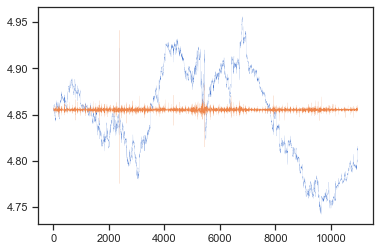

---
---


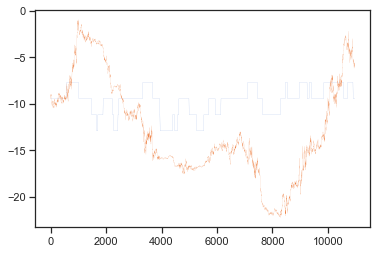

s_simule : [4.85515039 4.8518728  4.8467699  ... 5.19979265 5.20995439 5.22140119]


In [109]:
global display
display = True

niter = 1
temperature = 1.0
stepsize = 1.0
n = 1  #on laisse 1 pour l'instant
dt = 0.01 #Attention à ne pas changer le dt, ou alors il faut changer plein de trucs au sein des fonctions d'optimisation
param0 = (0.4*dt, #lam
          2.1, #b
          1.7, #m0
          0.00*dt, #beta PAS SUR DE CETTE VALEUR INITIALE
          100*dt, #kappa
          0.0*dt, #sigma
          0.99, #rho
          0.009*dt, #thetaBar
          0.5, #alpha PAS SUR DE CETTE VALEUR INITIALE
          1.0) #bStar
paramMSM0 = (0.4*dt, #lam
          2.1, #b
          1.7, #m0
          0.009*dt, #thetaBar
          0.5, #alpha PAS SUR DE CETTE VALEUR INITIALE
          1.0) #bStar

param1 = param0[: 9]

#récupération du data : il y a peut être deux trois trucs à changer. l'importation c'est qu'à la fin on ait un truc sous format 
#array (numpy) ou liste

symbol = "IBM"
frequence = 5
pathName = 'C:\\users\\hp\\MSM_dossier_sheng\\'+symbol+'\\'+str(frequence)+'min\\'

#dataframe = pd.read_csv(r"C:\\users\HP\\DEXJPUS_calvet.csv") #lien du data
dataframe = pd.read_csv(pathName + "merge_res.csv")
dataseries = dataframe.loc[dataframe.close != "."].close.astype(float)


S_data = list(dataseries)
T = len(S_data) - 1
print("S_data : ",S_data)

s_data = np.log(S_data)   #on prend le log
print("s_data :",s_data)
Y = s_data[1 : T+1] - s_data[0 : T]  #on s'intéresse aux return
print(Y, len(Y), T)
nVar = 50  #utile seulement pour les tests

disp([s_data, Y + s_data[0]], "data.png")

thetaBar = param0[7]
(s_simule, v_simule, theta_simule) = simuleData(True, paramCalcul(param0), 3, thetaBar, s_data[0], len(s_data)) #on crée aussi 
Y_simule = s_simule[1 : T+1] - s_simule[0 : T]
disp([np.log(theta_simule), (s_simule - s_simule[0])*10 + np.log(thetaBar)], "simuleTheta.png")
print("s_simule :",s_simule)

(0.004, 2.1, 1.7, 0.0, 1.0, 0.0, 0.99, 8.999999999999999e-05, 0.5, 1.0)
step1MinStar
0 100.0 10000.0
1 0.0 1.6094379124341003
2 1.001 1.999
3 1e-05 0.1
4 -1.0 1.0
5 -0.00020001000066669465 1.3862943611198906
PROBLEME step1 56337.25977698794 -56337.25845713444
step1 :  ['requested number of basinhopping iterations completed successfully']
(0.003999950655492524, 2.4119102321231254, 1.7477302476066399, 1e-05, 0.5, 0.999984037357746) -56337.25845713444
step2MinStar
step2 :  ['requested number of basinhopping iterations completed successfully']
(0.003999950655492524, 2.4119102321231254, 1.7477302476066399, 0.0, 1e-05, 0.5, 0.999984037357746) 56323.74065512481
---
---


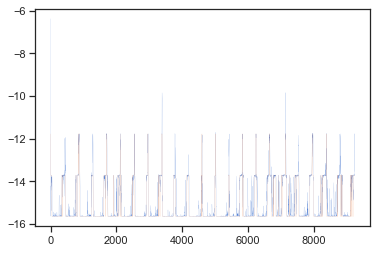

step3MinStar
[1.605445409895614e-07, 1.1122560184625832e-06, 1.1122560184625832e-06, 7.705733517819677e-06, 1.1122560184625832e-06, 7.705733517819677e-06, 7.705733517819677e-06, 5.3385486850163656e-05]
[1.0e+00 1.0e-04 9.9e-01]
[1.00000001e+00 1.00000000e-04 9.90000000e-01]
[1.00000000e+00 1.00014901e-04 9.90000000e-01]
[1.00000000e+00 1.00000000e-04 9.89999985e-01]
[1.34208493 0.01       0.09506545]
[1.34208494 0.01       0.09506545]
[1.34208493 0.00999999 0.09506545]
[1.34208493 0.01       0.09506547]
[2.01862275e+00 1.00000000e-04 1.00000000e-02]
[2.01862277e+00 1.00000000e-04 1.00000000e-02]
[2.01862275e+00 1.00014901e-04 1.00000000e-02]
[2.01862275e+00 1.00000000e-04 1.00000149e-02]
[5.e+01 1.e-04 1.e-02]
[2.60092996e+01 1.00000000e-04 1.00000000e-02]
[1.40139493e+01 1.00000000e-04 1.00000000e-02]
[8.01627424e+00 1.00000000e-04 1.00000000e-02]
[5.01743668e+00 1.00000000e-04 1.00000000e-02]
[3.5180179e+00 1.0000000e-04 1.0000000e-02]
[2.76830852e+00 1.00000000e-04 1.00000000e-02]
[

C:\Users\hp\miniconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


[5.e+01 1.e-02 1.e-02]
[2.56633623e+01 1.00000000e-02 6.27796167e-02]
[1.34950434e+01 1.00000000e-02 8.91694250e-02]
[7.41088585 0.01       0.10236433]
[4.36880866 0.01       0.10896177]
[2.84777023 0.01       0.11226049]
[2.08725068 0.01       0.11390986]
[1.70699055 0.01       0.11473454]
[1.51686031 0.01       0.11514688]
[1.42179502 0.01       0.11535305]
[1.37426235 0.01       0.11545614]
[1.37426237 0.01       0.11545614]
[1.37426235 0.00999999 0.11545614]
[1.37426235 0.01       0.11545615]
[2.48034112e+00 1.00000000e-04 6.55965993e-02]
[2.48034113e+00 1.00000000e-04 6.55965993e-02]
[2.48034112e+00 1.00014901e-04 6.55965993e-02]
[2.48034112e+00 1.00000000e-04 6.55966142e-02]
[2.79670012 0.01       0.31813886]
[2.79670013 0.01       0.31813886]
[2.79670012 0.00999999 0.31813886]
[2.79670012 0.01       0.31813887]
[1.25975701 0.01       0.44865418]
[1.25975702 0.01       0.44865418]
[1.25975701 0.00999999 0.44865418]
[1.25975701 0.01       0.4486542 ]
[2.01359455 0.01       0.81041

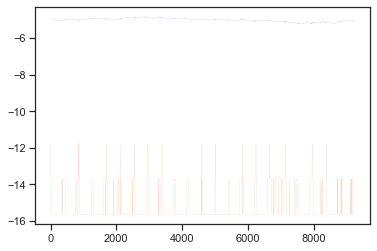

step1MinStar
0 100.0 10000.0
1 0.0 1.6094379124341003
2 1.001 1.999
3 1e-05 0.1
4 -1.0 1.0
5 -0.00020001000066669465 1.3862943611198906
PROBLEME step1 35499.33160269963 -35499.331602679325
step1 :  ['requested number of basinhopping iterations completed successfully']
(0.003999999998685971, 2.099968512191522, 1.6999858724844552, 9.201234439589766e-05, 0.5, 0.9999999979776668) -35499.331602679325
step2MinStar
step2 :  ['requested number of basinhopping iterations completed successfully']
(0.003999999998685971, 2.099968512191522, 1.6999858724844552, -7.209103377276977e-07, 9.201234439589766e-05, 0.5, 0.9999999979776668) 35498.5662896957
---
---


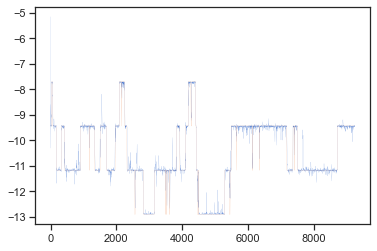

step3MinStar
[2.484684289790449e-06, 1.407909762519093e-05, 1.4079097625190928e-05, 7.977713335820796e-05, 1.407909762519093e-05, 7.977713335820796e-05, 7.977713335820795e-05, 0.00045204537792719425]
[1.0e+00 1.0e-04 9.9e-01]
[1.00000001e+00 1.00000000e-04 9.90000000e-01]
[1.00000000e+00 1.00014901e-04 9.90000000e-01]
[1.00000000e+00 1.00000000e-04 9.89999985e-01]
[1.32905942e+00 1.00000000e-04 9.90000000e-01]
[1.32905944e+00 1.00000000e-04 9.90000000e-01]
[1.32905942e+00 1.00014901e-04 9.90000000e-01]
[1.32905942e+00 1.00000000e-04 9.89999985e-01]
[2.19101417 0.01       0.99      ]
[2.19101418 0.01       0.99      ]
[2.19101417 0.00999999 0.99      ]
[2.19101417 0.01       0.98999999]
[2.62913568e+00 1.00000000e-04 8.65532797e-01]
[2.62913570e+00 1.00000000e-04 8.65532797e-01]
[2.62913568e+00 1.00014901e-04 8.65532797e-01]
[2.62913568e+00 1.00000000e-04 8.65532812e-01]
[1.5680837 0.01      0.99     ]
[1.56808371 0.01       0.99      ]
[1.5680837  0.00999999 0.99      ]
[1.5680837  0.0

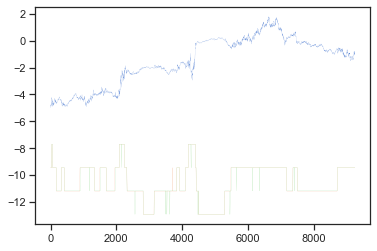

In [66]:
#estimation de paramètres sur DEXJPUS
print(param0)
param_data, thetaTab, LL2, LL3 = combMinStar(param0, (100, Y, 12, len(Y)), 3, 1, 20, temperature, stepsize)
print(param_data, LL2, LL3)
disp([(s_data-s_data[0])*5 - 5, thetaTab], "thetaTab_combMinStar_data.png")

#estimation de paramètres sur le data simulé
param_simule, thetaTab, LL2, LL3 = combMinStar(param0, (100, Y_simule, 12, len(Y_simule)), 3, 1, 20, temperature, stepsize)
print(param_simule, LL2, LL3)
disp([(s_simule-s_simule[0])*5 - 5, np.log(theta_simule), thetaTab], "thetaTab_combMinStar_simule.png")

In [67]:
print(param_data, param_simule)

(0.003999950655492524, 2.4119102321231254, 1.7477302476066399, 0.0, 0.509192399634925, 0.01, 0.01, 1e-05, 0.5, 0.999984037357746) (0.003999999998685971, 2.099968512191522, 1.6999858724844552, -7.209103377276977e-07, 0.31727437974504474, 0.01, 0.01, 9.201234439589766e-05, 0.5, 0.9999999979776668)


(0.004, 2.1, 1.7, 0.0, 1.0, 0.0, 0.99, 8.999999999999999e-05, 0.5, 1.0)
likelyhood2 end (False, 100, array([ 0.        ,  0.        ,  0.        , ..., -0.00125559,
       -0.00023246, -0.00251966]), 10, 3, 500) -459.32295502169916
likelyhood2 end (False, 100, array([ 0.        ,  0.        ,  0.        , ..., -0.00125559,
       -0.00023246, -0.00251966]), 10, 3, 500) -465.9528632060534
likelyhood2 end (False, 100, array([ 0.        ,  0.        ,  0.        , ..., -0.00125559,
       -0.00023246, -0.00251966]), 10, 3, 500) -465.896548994271
likelyhood2 end (False, 100, array([ 0.        ,  0.        ,  0.        , ..., -0.00125559,
       -0.00023246, -0.00251966]), 10, 3, 500) -464.0006959621495
likelyhood2 end (False, 100, array([ 0.        ,  0.        ,  0.        , ..., -0.00125559,
       -0.00023246, -0.00251966]), 10, 3, 500) -460.8575651833417
likelyhood2 end (False, 100, array([ 0.        ,  0.        ,  0.        , ..., -0.00125559,
       -0.00023246, -0.00251966]), 10, 3

likelyhood2 end (True, 100, array([ 0.        ,  0.        ,  0.        , ..., -0.00125559,
       -0.00023246, -0.00251966]), 10, 3, 500) -9.8832375560919
likelyhood2 end (True, 100, array([ 0.        ,  0.        ,  0.        , ..., -0.00125559,
       -0.00023246, -0.00251966]), 10, 3, 500) -10.644666649326659
likelyhood2 end (True, 100, array([ 0.        ,  0.        ,  0.        , ..., -0.00125559,
       -0.00023246, -0.00251966]), 10, 3, 500) -10.194138028448869
!!! 21
!!! 27
!!! 31
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
!!! 32
stop :  32
likelyhood2 end (True, 100, array([ 0.        ,  0.        ,  0.        , ..., -0.00125559,
       -0.00023246, -0.00251966]), 10, 3, 500

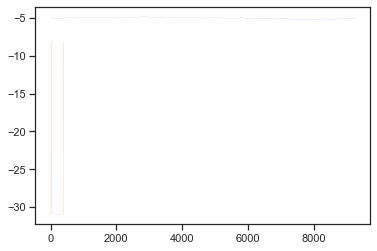

In [68]:
#estimation des paramètres avec la méthode de l'article (moins précise et plus longue à exécuter mais renvoie la vraie likelyhood)
#estimation de paramètres sur DEXJPUS
print(param0)
message, param_dataLL2, LL, _avec_etat = MinStar(likelyhood2, param0, (100, Y, 10, 3, 500, 1), 4, temperature, stepsize)
LLpr, M, v, thetaTab = _avec_etat
print(message)
print("LL(", param_dataLL2, ") = ", LL)
print("etat final : ", M, v)
disp([(s_data-s_data[0])*5 - 5, thetaTab], "thetaTab_MinStarLL2_data.png")


---
---
---


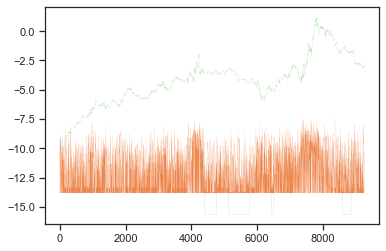

In [69]:
#simulation
thetaBar = param0[7]
param = param_data #par défaut, ce sont estimés sur le data
(s_simule, v_simule, theta_simule) = simuleData(True, paramCalcul(param), 3, thetaBar, s_data[0], T)
disp([np.log(theta_simule), np.log(v_simule + 1e-6), (s_simule - s_simule[0])*10 + np.log(thetaBar)], "simuleTheta.png")

In [106]:
symbol = "IBM"
frequence = 5

pathName = 'C:\\users\\hp\\MSM_dossier_sheng\\'+symbol+'\\'+str(frequence)+'min\\'

dat2 = pd.read_csv(pathName + "merge_res.csv")
dat2 = dat2.sort_values("time",ascending=True)
dat2 = dat2.loc[dat2.close != "."].close.astype(float)
dat2 = np.array(dat2)
dat2_rtn = dat2[0:-1]
dat2 = np.log(dat2[1:])-np.log(dat2[0:-1])
#dat2 = dat2[dat2 != 0]
dat2 = dat2[:,np.newaxis]
dat2_rtn = dat2_rtn[:,np.newaxis]
T = len(dat2)
E = np.rint(0.6*T).astype(int)
dat2E = dat2[0:E,]
dat2F = dat2[E:,]
dat2_rtnE = dat2_rtn[0:E,]
dat2_rtnF = dat2_rtn[E:,]
dat2E.shape, dat2F.shape

((6583, 1), (4389, 1))

### In sample

In [71]:
def r2p(p,y_pred,delta):
    P = np.zeros(y_pred.shape)
    P = P[delta:]
    for i in range(P.shape[0]):
        P[i,0] = p[i,0]
        for k in range(delta):
            P[i,0]*=np.exp(y_pred[i+k,0])
    return P

In [ ]:
delta = 1
x = dat2E[:-delta,]
y = dat2E[delta:,]
p = dat2_rtnE[delta:,]
R2 = 0
MSE = 0
MAE = 0
n = 1

init = simuleData(True, paramCalcul(param0), 3, thetaBar, s_data[0], len(s_data))
init =np.log(init[1:])-np.log(init[0:-1])
print(init)
for i in tqdm(range(n)):
    y_pred = np.zeros((E,1))
    print("zeros")
    for j in range(E-delta):
        if j<delta:
            y_pred[j,0] = init[j]
        else:
            temp = simuleData(True, paramCalcul(param0), 3, thetaBar, s_data[0], len(s_data))
            y_pred[j,0]=(np.log(temp[1:])-np.log(temp[0:-1]))[-1]
            print("etape")
            
    #y_pred = simulatedata(b,m0,gamma_kbar,sigma,kbar,E)
    p_pred = r2p(p,y_pred,delta)
    y_pred = y_pred[delta:,]
    R2 += sklearn.metrics.r2_score(y,y_pred)
    MSE += sklearn.metrics.mean_squared_error(p,p_pred)
    MAE += sklearn.metrics.mean_absolute_error(p,p_pred)
    

print("The R2 value of " , delta , " day(s) forcast in log return is: " , R2/n)
print("The MSE value of " , delta , " day(s) forcast in price is: " , MSE/n)
print("The MAE value of " , delta , " day(s) forcast in price is: " , MAE/n)

[[-10.89574097 -11.03802857 -11.04173156 ... -12.81121085 -12.81294197
  -12.81284502]
 [ -0.1427163    0.           0.         ...   0.           0.
    0.        ]]


  0%|          | 0/1 [00:00<?, ?it/s]

zeros


# Tests

In [ ]:
thetaBar = param0[7]
(s_, v_, theta_) = simuleData(True, paramCalcul(param0), 3, thetaBar, s_data[0], len(s_data))
Y_ = s_[1 : T+1] - s_[0 : T]
disp([np.log(theta_), (s_ - s_[0])*10 + np.log(thetaBar)], "simuleTheta.png")
#print(list(theta_), list(s_))

In [ ]:
LL_, thetaTab_ = detlikelyhood(paramMSM0, (False, Y_, len(Y_)))
print(LL_)
#LL__, thetaTab__ = detlikelyhoodAvecSauts(param0, (False, Y_, len(Y_)))
m0 = paramMSM0[2]
thetaBar = paramMSM0[3] #param0[7]
print(thetaTab_[0], np.log(theta_[0]))
disp([s_, Y_ + s_[0]], "s.png")

low = [np.log(thetaMt(m0, 0, thetaBar))]*len(Y)
high = [np.log(thetaMt(m0, 2**kbar - 1, thetaBar))]*len(Y)

lisse(thetaTab_)
regularise(m0, thetaBar, thetaTab_)

disp([(s_-s_[0])*5 - 5, np.log(theta_), np.log(thetaTab_), low, high], "test_thetaTab_on_skew_step2.png")



In [ ]:
global display
display = True

LL0, thetaTab0 = detlikelyhood(paramMSM0, (False, Y_, len(Y_)))
print(LL0)
m0 = paramMSM0[2]
thetaBar = paramMSM0[3]
lisse(thetaTab0)
regularise(m0, thetaBar, thetaTab0)
disp([(s_-s_[0])*5 - 5, np.log(theta_), np.log(thetaTab0)], "thetaTabInitial.png")
message, paramStep1, LL, thetaTab = step1MinStar(paramMSM0, (Y_, len(Y_)), niter, temperature, stepsize)
print(message)
print("LL(", paramStep1, ") = ", LL)
print(LL)
lisse(thetaTab)
regularise(m0, thetaBar, thetaTab)
disp([(s_-s_[0])*5 - 5, np.log(theta_), np.log(thetaTab)], "thetaTabstep1MinStar.png")

In [ ]:
message, paramStep1, LL, thetaTab = step2MinStar(0, (paramMSM0, Y_, len(Y_)), niter, temperature, stepsize)
disp([(s_-s_[0])*5 - 5, np.log(theta_), thetaTab], "thetaTabstep2MinStar.png")
print(thetaTab[0])
m0 = paramMSM0[2]
thetaBar = paramMSM0[3]
lisse(thetaTab)
regularise(m0, thetaBar, thetaTab)

disp([(s_-s_[0])*5 - 5, np.log(theta_), np.log(thetaTab)], "thetaTabstep2MinStar.png")

In [ ]:
param, thetaTab, LL2, LL3 = combMinStar(param0, (100, Y_, 15, len(Y_)), 4, 1, 10, temperature, stepsize)
print(param, LL2, LL3)
disp([(s_-s_[0])*5 - 5, np.log(theta_), np.log(thetaTab)], "thetaTabstep2MinStar.png")

In [ ]:
"""
print(likelyhood6(param0, (False, 200, Y_, 20, len(Y_), thetaTab_)))
global display
display = False
print(likelyhood1(paramCalcul(param0), (True, 100, Y, 20, T)))
print(likelyhood2(paramCalcul(param0), (True, 100, Y, 10, 3, T)))
print(likelyhood2bis(paramCalcul(param0), (True, 100, Y, 10, 3, T)))
print(likelyhood2s(paramCalcul(param0), (True, 100, Y, 10, T)))
print(likelyhood3(paramCalcul(param0), (True, 100, Y, 10, T)))
print(likelyhood4(paramCalcul(param0), (True, 100, Y, 10, 5, T)))
print(likelyhood4s(paramCalcul(param0), (True, 100, Y, 10, T)))
print(likelyhood5(paramCalcul(param0), (True, 100, Y, 10, 1, T)))
display = True
"""
global display
display = True
tab_1 = likelyhood1(paramCalcul(param0), (True, 100, Y, 20, T))[3]
tab_2 = likelyhood2(paramCalcul(param0), (True, 100, Y, 10, 3, T))[3]
tab_2bis = likelyhood2bis(paramCalcul(param0), (True, 100, Y, 10, 3, T))[3]
tab_2s = likelyhood2s(paramCalcul(param0), (True, 100, Y, 10, T))[3]
tab_3 = likelyhood3(paramCalcul(param0), (True, 100, Y, 10, T))[3]
tab_4 = likelyhood4(paramCalcul(param0), (True, 100, Y, 10, 5, T))[3]
tab_4s = likelyhood4s(paramCalcul(param0), (True, 100, Y, 10, T))[3]
tab_5 = likelyhood5(paramCalcul(param0), (True, 100, Y, 10, 1, T))[3]



In [ ]:
disp([tab_1, tab_2, tab_2bis, tab_2s, tab_3, tab_4, tab_4s, tab_5, np.log(theta_), np.log(thetaTab_)], "comparaison4.png")

In [ ]:
print(list(thetaTab_), list(s_))
display([thetaTab_], "test...png")
display([s_], "test...png")
. =

In [ ]:
#print(VLL(param0, (True, Y, 20, T, 1, nVar), likelyhood1))
#print(VLL(param0, (True, Y, 10, T, 1, nVar), likelyhood2s))
#print(VLL(param0, (True, Y, 10, 0, T, 1, nVar), likelyhood5))
global display
display = True

pO1 = paramOpti(param1)
pO0 = paramOpti(param0)
print(param1)
print(pO1)
print(paramRapport(1, pO1))
print(paramCalcul(paramRapport(1, pO1)))


print(ELL(pO1, (100, Y, 20, T, 1), likelyhood1))
print(ELL(pO1, (100, Y, 10, 3, T, 1), likelyhood2))
print(ELL(pO1, (100, Y, 10, 3, T, 1), likelyhood2bis))
print(ELL(pO1, (100, Y, 10, T, 1), likelyhood2s))
print(ELL(pO1, (100, Y, 5, T, 1), likelyhood3))
print(ELL(pO1, (100, Y, 10, 10, T, 1), likelyhood4))
print(ELL(pO1, (100, Y, 10, T, 1), likelyhood4s))
print(ELL(pO1, (100, Y, 10, 0, T, 1), likelyhood5))
print("...")
print(ELL(pO0, (100, Y, 20, T, 1), likelyhood1))
print(ELL(pO0, (100, Y, 10, 3, T, 1), likelyhood2))
print(ELL(pO0, (100, Y, 10, 3, T, 1), likelyhood2bis))
print(ELL(pO0, (100, Y, 10, T, 1), likelyhood2s))
print(ELL(pO0, (100, Y, 5, T, 1), likelyhood3))
print(ELL(pO0, (100, Y, 10, 10, T, 1), likelyhood4))
print(ELL(pO0, (100, Y, 10, T, 1), likelyhood4s))
print(ELL(pO0, (100, Y, 10, 0, T, 1), likelyhood5))



In [ ]:
MinStar(likelyhood1, param0,  (100, Y, 10, T, 1), niter, 0, stepsize)

In [ ]:
"""
pour rappel, args = (stop, Y, K, Kpr, T, n)
"""

argsGrossiere = (2, Y, 5, 0, 100, 1)
argsFine = (60, Y, 15, 0, 200, 1)
gloMin(likelyhood5, True, argsGrossiere, argsFine, 1, temperature, stepsize, 4)

In [ ]:
display([[1, 2, 3, 4], [1, 4, 9, 16]])

In [ ]:
a = (1, 2, (1, 2))
print(len(a))
x, y, z = a
print(x, y, z)

In [ ]:
print(VLL(param0, True, (500, Y, 100, 3, T, 1, nVar), likelyhood2))
print(VLL(param0, True, (500, Y, 100, 3, T, 1, nVar), likelyhood2bis))
print(VLL(param0, True, (500, Y, 100, T, 1, nVar), likelyhood2s))
print(VLL(param0, True, (500, Y, 60, T, 1, nVar), likelyhood3))
print(VLL(param0, True, (500, Y, 60, 10, T, 1, nVar), likelyhood4))
print(VLL(param0, True, (500, Y, 80, T, 1, nVar), likelyhood4s))
print(VLL(param0, True, (500, Y, 100, 0, T, 1, nVar), likelyhood5))
print(VLL(param0, True, (500, Y, 80, 10, T, 1, nVar), likelyhood5))
print(VLL(param0, True, (500, Y, 50, 40, T, 1, nVar), likelyhood5))

In [ ]:
print(MinNotStar(likelyhood1, (Y, 10, T, 1), niter, temperature, stepsize))
print(MinNotStar(likelyhood2, (Y, 3, 2, T, 1), niter, temperature, stepsize))
print(MinNotStar(likelyhood2bis, (Y, 3, 2, T, 1), niter, temperature, stepsize))
print(MinNotStar(likelyhood2s, (Y, 3, T, 1), niter, temperature, stepsize))
print(MinNotStar(likelyhood3, (Y, 3, T, 1), niter, temperature, stepsize))
print(MinNotStar(likelyhood4, (Y, 3, 1, T, 1), niter, temperature, stepsize))
print(MinNotStar(likelyhood4s, (Y, 3, T, 1), niter, temperature, stepsize))
print(MinNotStar(likelyhood5, (Y, 5, 0, T, 1), niter, temperature, stepsize))
print("...")
print(MinStar(likelyhood1, (Y, 10, T, 1), niter, temperature, stepsize))
print(MinStar(likelyhood2, (Y, 3, 2, T, 1), niter, temperature, stepsize))
print(MinStar(likelyhood2bis, (Y, 3, 2, T, 1), niter, temperature, stepsize))
print(MinStar(likelyhood2s, (Y, 3, T, 1), niter, temperature, stepsize))
print(MinStar(likelyhood3, (Y, 3, T, 1), niter, temperature, stepsize))
print(MinStar(likelyhood4, (Y, 3, 1, T, 1), niter, temperature, stepsize))
print(MinStar(likelyhood4s, (Y, 3, T, 1), niter, temperature, stepsize))
print(MinStar(likelyhood5, (Y, 5, 0, T, 1), niter, temperature, stepsize))